### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import time
import random
import copy
import os
import sys
import circuits

from scipy import interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

from collections import defaultdict
from math import log2

print (pd.__version__)
RUN_CONFIGURATION_LOOP = False

Using TensorFlow backend.


1.0.3


C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Graph functions

In [2]:
def graph_with_errs_d3(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["Z3"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
        
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
        

def graph_with_errs_d5(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
             x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["Z6"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X10"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z11"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["X19"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z20"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X21"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
            
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df


def graph_with_errs_d7(df):
    x_data = []
    z_data = []

    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, -0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 0.5, 5.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 0.5, 6.5))
        if df.loc[i].at["Z10"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X11"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 1.5, 4.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 1.5, 5.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z19"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X20"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z21"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 2.5, 5.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 2.5, 6.5))
        if df.loc[i].at["Z24"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X25"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["Z26"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X27"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["Z28"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        if df.loc[i].at["X29"] == -1:
            x_data[i].append((0, 3.5, 4.5))
        if df.loc[i].at["Z30"] == -1:
            z_data[i].append((0, 3.5, 5.5))
        if df.loc[i].at["Z31"] == -1:
            z_data[i].append((0, 4.5, 0.5))
        if df.loc[i].at["X32"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z33"] == -1:
            z_data[i].append((0, 4.5, 2.5))
        if df.loc[i].at["X34"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z35"] == -1:
            z_data[i].append((0, 4.5, 4.5))
        if df.loc[i].at["X36"] == -1:
            x_data[i].append((0, 4.5, 5.5))
        if df.loc[i].at["Z37"] == -1:
            z_data[i].append((0, 4.5, 6.5))
        if df.loc[i].at["Z38"] == -1:
            z_data[i].append((0, 5.5, -0.5))
        if df.loc[i].at["X39"] == -1:
            x_data[i].append((0, 5.5, 0.5))
        if df.loc[i].at["X40"] == -1:
            x_data[i].append((0, 6.5, 1.5))
        if df.loc[i].at["Z41"] == -1:
            z_data[i].append((0, 5.5, 1.5))
        if df.loc[i].at["X42"] == -1:
            x_data[i].append((0, 5.5, 2.5))
        if df.loc[i].at["X43"] == -1:
            x_data[i].append((0, 6.5, 3.5))
        if df.loc[i].at["Z44"] == -1:
            z_data[i].append((0, 5.5, 3.5))
        if df.loc[i].at["X45"] == -1:
            x_data[i].append((0, 5.5, 4.5))
        if df.loc[i].at["X46"] == -1:
            x_data[i].append((0, 6.5, 5.5))
        if df.loc[i].at["Z47"] == -1: 
            z_data[i].append((0, 5.5, 5.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
        
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df

### MWPM functions

In [3]:
def add_measurement_errs(curr_syn, prob_err, x_syn, depth):
    #x_syn is True if it is x syndrome, False if it is Z syndrome
    total_time = 0
    new_syn = []
    if x_syn:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_xmeasurement_errs(depth, prob_err))
    else:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_zmeasurement_errs(depth, prob_err))


def do_new_decoding(data, depth, prob_err):
    decoder = circuits.GraphDecoder(depth,1)
    G = decoder.S['Z']
    df = pd.DataFrame()
    syn = []
    total_time = 0
    
    for row in data:
        x_input = []
        z_input = []
        x_type = True
        for col in row:
            if not col == "[]":
                col = eval(col)
                for c in col:
                    if x_type:
                        x_input.append(c)
                    else:
                        z_input.append(c)
            x_type = not x_type  
            
        if prob_err > 0:
            syndromes_x = add_measurement_errs(x_input, prob_err, True, depth)
            syndromes_z = add_measurement_errs(z_input, prob_err, False, depth)
        else:
            syndromes_x = x_input
            syndromes_z = z_input

        start = time.time_ns()
        error_graph_x, paths_x = decoder.make_error_graph(syndromes_x,'X')
        matching_graph_x = decoder.matching_graph(error_graph_x,'X')
        matches_x = decoder.matching(matching_graph_x,'X')
        flips_x = decoder.calculate_qubit_flips(matches_x, paths_x,'X')
        syn_x = (translate_errors(flips_x))

        error_graph_z, paths_z = decoder.make_error_graph(syndromes_z,'Z')
        matching_graph_z = decoder.matching_graph(error_graph_z,'Z')
        matches_z = decoder.matching(matching_graph_z,'Z')
        flips_z = decoder.calculate_qubit_flips(matches_z, paths_z,'Z')
        syn_z = translate_errors(flips_z)
        df = df.append(pd.Series([syn_x, syn_z]), ignore_index=True)
        end = time.time_ns()
        total_time += (end - start)/ (10 ** 9)
    return (df, total_time) 


def return_xmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, 1.5, 0.5), (0, 2.5, 1.5)]
    elif depth == 5:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, 1.5, 0.5), (0, 1.5, 2.5),
                        (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 3.5, 0.5), (0, 4.5, 1.5), (0, 3.5, 2.5), (0, 4.5, 3.5)]
    else:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, -0.5, 4.5), (0, 0.5, 5.5),
                        (0, 1.5, 0.5), (0, 1.5, 2.5), (0, 1.5, 4.5), (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 2.5, 5.5),
                        (0, 3.5, 0.5),  (0, 3.5, 2.5), (0, 3.5, 4.5), (0, 4.5, 1.5), (0, 4.5, 3.5), (0, 4.5, 5.5),
                       (0, 5.5, 0.5), (0, 6.5, 1.5), (0, 5.5, 2.5), (0, 6.5, 3.5), (0, 5.5, 4.5), (0, 6.5, 5.5)]
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs
            

def return_zmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
    elif depth == 5:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 1.5, -0.5), (0, 1.5, 1.5), (0, 1.5, 3.5),
                        (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 3.5, -0.5), (0, 3.5, 1.5), (0, 3.5, 3.5)]
    else:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 0.5, 6.5), (0, 1.5, -0.5), (0, 1.5, 1.5),
                        (0, 1.5, 3.5), (0, 1.5, 5.5), (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 2.5, 6.5),
                        (0, 3.5, -0.5),  (0, 3.5, 1.5), (0, 3.5, 3.5), (0, 3.5, 5.5), (0, 4.5, 0.5), (0, 4.5, 2.5),
                       (0, 4.5, 4.5), (0, 4.5, 6.5), (0, 5.5, -0.5), (0, 5.5, 1.5), (0, 5.5, 3.5), (0, 5.5, 5.5)]
        
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs


def translate_errors (phys_errs):
    flipX = np.array([(0, 1),(1, 0)])
    flipZ = np.array([(1, 0), (0, -1)])
    errs = []
    str2 = ""
    for qubit, flip in phys_errs.items():
        row = int(qubit[1])
        col = int(qubit[2])
        if str(flip) == "X":
            str1 = "X"
        elif str(flip) == "Z":
            str1 = "Z"
        else:
            str1 = "X"
            str2 = "Z"
        str1 += str(row) + str(col)
        errs.append(str1)
        if str2 != "":
            str2 += str(row) +str(col)
            errs.append(str2)
            str2 = ""
    return errs   


def translate_to_graph(df_graph, labels, mlb):
#go through labels given
    indices = []
    labels = mlb.inverse_transform(labels)
    
    for row in labels:
        label_str = str(row)
        for index, r in df_graph.iterrows():
            if label_str == "('',)":
                if str(r["Labels"]) == "[' ']":
                    indices.append([index])
                    break
            if set(row) == set(r["Labels"]):
                indices.append([index])
                break

    df_syns = df_graph.drop(['Labels'], axis=1)
    return_df = pd.DataFrame()
    for i in indices:
        return_df = return_df.append(df_syns.loc[i])
    return return_df

### Preprocessing functions

In [4]:
def create_list_from_string(err_list):
    newstring = err_list.replace("'", "")
    new_err_list = newstring.strip('][').split(', ')
    return sorted(set(new_err_list))


def create_string_from_list(err_list):
    return_string = "["
    if err_list[0] == "''":
        return "[' ']"
    else:
        for index, i in enumerate(err_list):
            return_string = return_string +  "'" + i + "'"
            if index < (len(err_list)-1):
                return_string += ", "
    return return_string + "]"
        

#take in two 2d arrays of predicted values, true values, and threshold to determine labels. 
#calculates the partial accuracy of the predicted values, averaged out for all obersvations
def partial_accuracy(y_pred, y_true):
    total = 0
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    for i in range(0, rows):
        row_correct = 0
        for j in range(0, cols):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
        total += row_correct/cols
    return total/rows


def partial_accuracy_and_contingency(y_pred, y_true, mlb):
    total = 0
    a= np.zeros(shape=y_true.shape)
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    df = pd.DataFrame(a, columns = mlb.classes_)
    for i in range(0, rows):
        row_correct = 0
        for j, label in enumerate(mlb.classes_):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
                df.at[i, label] = 1
            else:
                df.at[i, label] = 0

        total += row_correct/cols

    return (total/rows, df)


def contingency_table_and_t (clf1, clf2):
    a = 0 #clf1 pos, clf2 pos
    b = 0 #clf1 pos, clf2 neg
    c = 0 #clf1 neg, clf2 pos
    d = 0 #clf1 neg, clf2 neg
    
    for index, value in clf1.items():
        if value == 1 and clf2[index] == 1:
            a+=1
        elif value == 1 and clf2[index] == 0: #classifier 1 right, classifier 2 wrong
            b+=1
        elif value == 0 and clf2[index] == 1: #classifier 1 wrong, classifier 2 right
            c+=1
        else:
            d+=1
    print("["+str(a)+", "+str(b)+"]")
    print("["+str(c)+", "+str(d)+"]")
    if b == 0 and c ==0:
        print("both b and c are zero")
        t=0
    else:
        t = (((b-c)-1)**2)/(b+c)
    return ([[a,b],[c,d]], t)


def add_noise(val, noise_level):
    rand = random.uniform(0, 1)
    if rand <= noise_level:
        if val == -1:
            val = 1
        elif val == 1:
            val = -1
    return val

### Lookup table functions

In [5]:
def generateAllBinaryStrings(n, arr, i, lookup):  
    if i == n: 
        lookup.setBitStringArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1, lookup)  
  
    # And then assign "1" at ith position  , 
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1, lookup)


class lookup_decoder:
    
    def __init__(self, depth):
        #self.lookupTable = defaultdict()
        self.lookupTable = {}
        self.distributions = {}
        self.depth = depth
        #generating all possible syndrome observations
        #arr = [None] * (depth**2 - 1)
        #generateAllBinaryStrings((depth**2 - 1), arr, 0, self)
        
    def setBitStringArray(self, arr, n): 
        new_str = ""
        for i in range(0, n):  
            new_str += str(arr[i])
        self.lookupTable.update({new_str:defaultdict()})  
        
    def update_table (self, syndrome, phys_errs):
        #all the keys are made in the init, so simply update the physical error combinations for the given syndrome
        if syndrome not in self.lookupTable:
            self.lookupTable[syndrome] = {}
            self.lookupTable[syndrome][phys_errs] = 1
            return
        
        if phys_errs not in self.lookupTable[syndrome]:
            self.lookupTable[syndrome].update({phys_errs: 1})
        else:
            self.lookupTable[syndrome][phys_errs] += 1
     
    def get_probable_error(self, syndrome):
        return_key = []

        if syndrome not in self.lookupTable.keys():
            for i in range(2* int(self.depth**2) + 1):
                return_key.append(0)
            return return_key
        
        key, value = max(self.lookupTable[syndrome].items(), key=lambda x:x[1])
        
        for character in key:
            if character == '0' or character == '1':
                return_key.append(int(character))
                
        return return_key
        
    def make_distribution_graph(self, syn):
        
        plt.bar(list(self.lookupTable[syn].keys()), self.lookupTable[syn].values(), color='g')
        plt.show()
        
    def syndrome_count_graph(self):
        graph_dict = {}
        for syn in self.lookupTable:
            graph_dict.update({syn:sum(self.lookupTable[syn].values())})
        plt.ylim((0,4))
        plt.bar(graph_dict.keys(), graph_dict.values())
        plt.show()
    
    def length_of_lookup(self):
        print(len(self.lookupTable))
            
    def get_entropies(self):
        entropies = {}
        for syn in self.lookupTable:
            total = sum(self.lookupTable[syn].values())
            h = 0
            for key in self.lookupTable[syn]:
                p = self.lookupTable[syn][key]/total
                h += p+log2(p)
            entropies[syn] = -h
        print(entropies)
            
    def get_syndromes(self):
        return self.lookupTable.keys()
                     
    def print_lookup(self):
        for syn in self.lookupTable:
            print(self.lookupTable[syn])
            

def train_plut(table, data_x, data_y):
    i = 0
    for index, x in enumerate(data_x):
        syn = "".join([str(i) for i in x])
        syn = syn.replace(".0","")
        labels = np.array2string(np.array(data_y[i]), precision=1, separator='',suppress_small=True).replace("[","").replace("]","")
        table.update_table(syn, labels)
        i+=1
    return table


def test_plut(table, test_set):
    predictions_lookup = []
    for index, x in enumerate(test_set):
        syn_x = "".join([str(i) for i in x])
        syn_x = syn_x.replace(".0","")
        predictions_lookup.append(table.get_probable_error(syn_x))
    return np.array(predictions_lookup)

### Model compilation functions

In [6]:
def compile_FFNN_model_DepthThree(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(8, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(18 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthThree(depth):
    model = Sequential()
    layers = 4

    model.add(Dense(8, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(19 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthFive(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(24, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(240, activation='relu'))
    
    model.add(Dense(51, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthSeven(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(48, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(400, activation='relu'))
    
    model.add(Dense(99, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model

# D3 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D3:
* Original:
    - "depth3_all_combos.csv"
* Exhaustive:
    - "ex-samples-d3.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d3-1000.csv"
    - "v2samples-d3-10000.csv"
    - "v2samples-d3-100000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d3-1000.csv"
    - "v3samples-d3-10000.csv"

In [36]:
start_time = time.time()
trainData_d3 = pd.read_csv("SAMPLES/v3samples-d3-10000.csv")

trainData_d3["Labels"] = trainData_d3['Labels'].map(lambda x: create_list_from_string(x))
trainData_d3 = trainData_d3.applymap(lambda x: add_noise(x,.01))

testData_d3_MWPM = graph_with_errs_d3(trainData_d3)

mlb_d3 = MultiLabelBinarizer()
mlb_d3.fit(trainData_d3["Labels"])
df = pd.DataFrame(mlb_d3.transform(trainData_d3['Labels']))
df['Labels']= df.values.tolist()
trainData_d3 = trainData_d3.drop(['Labels'], axis=1)
trainData_d3 = pd.concat([df['Labels'], testData_d3_MWPM, trainData_d3], axis=1, ignore_index=True)
trainData_d3.columns = ["Labels","XSyn", "ZSyn", "X0", "Z1", "X2", "Z3", "Z4", "X5", "X6", "Z7"]

y_d3 = trainData_d3["Labels"]
x_d3 = trainData_d3.drop(["Labels"], axis=1)

x_d3 = x_d3.replace([-1], 0)
print("Data imported and formatted in %s seconds" % (time.time() - start_time))

Data imported and formatted in 13.901138544082642 seconds


### Fit model on training data

In [37]:
start_time = time.time()
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d3 = inputs[:,2:]
train_output_d3 = targets[:,1:]

x_train_d3, x_test_d3, Y_train_d3, Y_test_d3 = train_test_split(train_input_d3, train_output_d3, train_size=0.75, shuffle=True)

model = compile_FFNN_model_DepthThree(3)
print("Fit model on training data")
history = model.fit(
    x=x_train_d3,
    y=Y_train_d3,
    validation_split=.25,
    epochs=200
)
model.summary()
print("Model trained in %s seconds" % (time.time() - start_time))

Fit model on training data
Train on 5625 samples, validate on 1875 samples
Epoch 1/200
5625/5625 [==============================] - 0s 59us/step - loss: 0.6442 - accuracy: 0.7006 - val_loss: 0.5934 - val_accuracy: 0.7446
Epoch 2/200
5625/5625 [==============================] - 0s 36us/step - loss: 0.5770 - accuracy: 0.7443 - val_loss: 0.5717 - val_accuracy: 0.7447
Epoch 3/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5706 - accuracy: 0.7443 - val_loss: 0.5702 - val_accuracy: 0.7447
Epoch 4/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5694 - accuracy: 0.7443 - val_loss: 0.5692 - val_accuracy: 0.7447
Epoch 5/200
5625/5625 [==============================] - 0s 36us/step - loss: 0.5684 - accuracy: 0.7443 - val_loss: 0.5682 - val_accuracy: 0.7447
Epoch 6/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5674 - accuracy: 0.7443 - val_loss: 0.5672 - val_accuracy: 0.7447
Epoch 7/200
5625/5625 [==========================

5625/5625 [==============================] - 0s 33us/step - loss: 0.5304 - accuracy: 0.7445 - val_loss: 0.5308 - val_accuracy: 0.7447
Epoch 57/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5303 - accuracy: 0.7445 - val_loss: 0.5306 - val_accuracy: 0.7432
Epoch 58/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5301 - accuracy: 0.7442 - val_loss: 0.5304 - val_accuracy: 0.7432
Epoch 59/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5300 - accuracy: 0.7439 - val_loss: 0.5303 - val_accuracy: 0.7433
Epoch 60/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.5300 - accuracy: 0.7443 - val_loss: 0.5301 - val_accuracy: 0.7441
Epoch 61/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5297 - accuracy: 0.7445 - val_loss: 0.5300 - val_accuracy: 0.7434
Epoch 62/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5296 - accuracy: 0.7444 - val_loss: 0.5295 - val_a

Epoch 112/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5213 - accuracy: 0.7449 - val_loss: 0.5213 - val_accuracy: 0.7448
Epoch 113/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5213 - accuracy: 0.7451 - val_loss: 0.5212 - val_accuracy: 0.7444
Epoch 114/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5211 - accuracy: 0.7451 - val_loss: 0.5213 - val_accuracy: 0.7450
Epoch 115/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5211 - accuracy: 0.7449 - val_loss: 0.5210 - val_accuracy: 0.7443
Epoch 116/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5210 - accuracy: 0.7449 - val_loss: 0.5218 - val_accuracy: 0.7437
Epoch 117/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.5209 - accuracy: 0.7449 - val_loss: 0.5213 - val_accuracy: 0.7445
Epoch 118/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5209 - accuracy: 0.7451 - val_

5625/5625 [==============================] - 0s 36us/step - loss: 0.5196 - accuracy: 0.7461 - val_loss: 0.5206 - val_accuracy: 0.7445
Epoch 168/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5197 - accuracy: 0.7461 - val_loss: 0.5202 - val_accuracy: 0.7446
Epoch 169/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.5197 - accuracy: 0.7456 - val_loss: 0.5200 - val_accuracy: 0.7453
Epoch 170/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5198 - accuracy: 0.7453 - val_loss: 0.5198 - val_accuracy: 0.7449
Epoch 171/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.5196 - accuracy: 0.7458 - val_loss: 0.5200 - val_accuracy: 0.7441
Epoch 172/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5197 - accuracy: 0.7459 - val_loss: 0.5200 - val_accuracy: 0.7442
Epoch 173/200
5625/5625 [==============================] - 0s 35us/step - loss: 0.5196 - accuracy: 0.7462 - val_loss: 0.5204 -

### Generate confusion matrix and F1 scores on test sets

In [38]:
predictions_d3 = model.predict(x_test_d3)

y_pred = predictions_d3
y_test = Y_test_d3

y_pred[y_pred>=.5]=1 
y_pred[y_pred<.5]=0

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)-1):
    for j in range(len(y_test[0])-1):
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 1:
            TP += 1
        if y_pred[i][j] == 1 and y_test[i][j] != y_pred[i][j]:
            FP += 1
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 0:
            TN += 1
        if y_pred[i][j] == 0 and y_test[i][j] != y_pred[i][j]:
            FN += 1
            
print("True positive:   " + str(TP) + "\nFalse positive:  " + str(FP) + "\nTrue negative:   " + str(TN) + "\nFalse negative:  " + str(FN))

True positive:   1507
False positive:  1549
True negative:   30194
False negative:  9250


### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

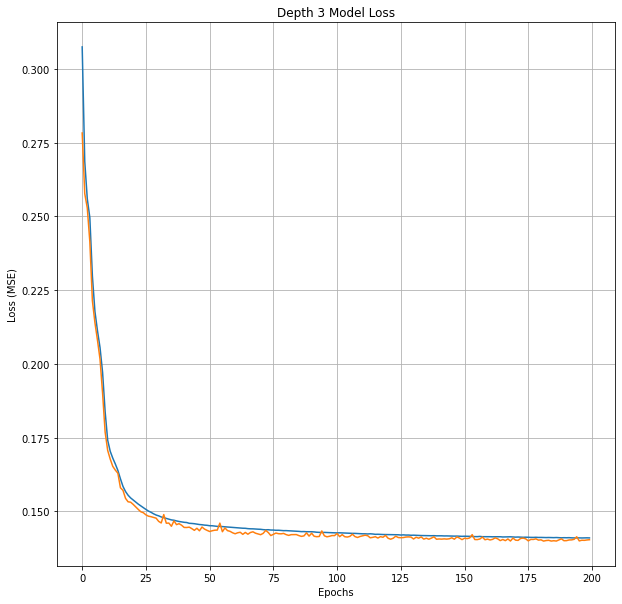

In [27]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 3 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

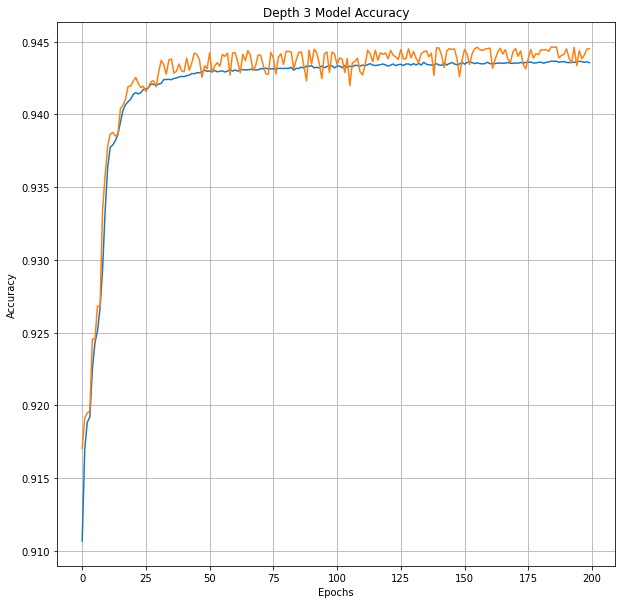

In [28]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 3 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [39]:
model.save("model_d3_v3-10k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 6400 samples, validate on 1600 samples
Epoch 1/200
6400/6400 [==============================] - 0s 53us/step - loss: 0.6532 - accuracy: 0.7058 - val_loss: 0.6188 - val_accuracy: 0.7075
Epoch 2/200
6400/6400 [==============================] - 0s 34us/step - loss: 0.5550 - accuracy: 0.7632 - val_loss: 0.5814 - val_accuracy: 0.7261
Epoch 3/200
6400/6400 [==============================] - 0s 35us/step - loss: 0.5345 - accuracy: 0.7657 - val_loss: 0.5769 - val_accuracy: 0.7261
Epoch 4/200
6400/6400 [==============================] - 0s 33us/step - loss: 0.5322 - accuracy: 0.7657 - val_loss: 0.5760 - val_accuracy: 0.7261
Epoch 5/200
6400/6400 [==============================] - 0s 33us/step - loss: 0.5307 - accuracy: 0.7657 - val_loss: 0.5741 - val_accuracy: 0.7261
Epoch 6/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.5294 - accuracy: 0.7657 - val_loss: 0.5737 - 

Epoch 56/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4934 - accuracy: 0.7658 - val_loss: 0.5470 - val_accuracy: 0.7266
Epoch 57/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4935 - accuracy: 0.7654 - val_loss: 0.5480 - val_accuracy: 0.7265
Epoch 58/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4933 - accuracy: 0.7657 - val_loss: 0.5477 - val_accuracy: 0.7257
Epoch 59/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4933 - accuracy: 0.7658 - val_loss: 0.5460 - val_accuracy: 0.7261
Epoch 60/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4932 - accuracy: 0.7655 - val_loss: 0.5462 - val_accuracy: 0.7268
Epoch 61/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4932 - accuracy: 0.7661 - val_loss: 0.5476 - val_accuracy: 0.7260
Epoch 62/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4931 - accuracy: 0.7658 - val_loss: 0

6400/6400 [==============================] - 0s 33us/step - loss: 0.4915 - accuracy: 0.7665 - val_loss: 0.5472 - val_accuracy: 0.7272
Epoch 112/200
6400/6400 [==============================] - 0s 33us/step - loss: 0.4915 - accuracy: 0.7668 - val_loss: 0.5466 - val_accuracy: 0.7276
Epoch 113/200
6400/6400 [==============================] - 0s 33us/step - loss: 0.4914 - accuracy: 0.7668 - val_loss: 0.5472 - val_accuracy: 0.7264
Epoch 114/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4914 - accuracy: 0.7668 - val_loss: 0.5469 - val_accuracy: 0.7263
Epoch 115/200
6400/6400 [==============================] - 0s 34us/step - loss: 0.4914 - accuracy: 0.7665 - val_loss: 0.5472 - val_accuracy: 0.7258
Epoch 116/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4913 - accuracy: 0.7666 - val_loss: 0.5466 - val_accuracy: 0.7264
Epoch 117/200
6400/6400 [==============================] - 0s 33us/step - loss: 0.4913 - accuracy: 0.7669 - val_loss: 0.5472 -

6400/6400 [==============================] - 0s 33us/step - loss: 0.4907 - accuracy: 0.7671 - val_loss: 0.5470 - val_accuracy: 0.7260
Epoch 167/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4906 - accuracy: 0.7672 - val_loss: 0.5469 - val_accuracy: 0.7265
Epoch 168/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4906 - accuracy: 0.7673 - val_loss: 0.5473 - val_accuracy: 0.7257
Epoch 169/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4906 - accuracy: 0.7672 - val_loss: 0.5470 - val_accuracy: 0.7259
Epoch 170/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4906 - accuracy: 0.7672 - val_loss: 0.5475 - val_accuracy: 0.7263
Epoch 171/200
6400/6400 [==============================] - 0s 33us/step - loss: 0.4906 - accuracy: 0.7669 - val_loss: 0.5469 - val_accuracy: 0.7265
Epoch 172/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4906 - accuracy: 0.7674 - val_loss: 0.5475 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 2 ...
Train on 6400 samples, validate on 1601 samples
Epoch 1/200
6400/6400 [==============================] - 0s 48us/step - loss: 0.6158 - accuracy: 0.7052 - val_loss: 0.5877 - val_accuracy: 0.7261
Epoch 2/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.5381 - accuracy: 0.7661 - val_loss: 0.5801 - val_accuracy: 0.7261
Epoch 3/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5331 - accuracy: 0.7661 - val_loss: 0.5780 - val_accuracy: 0.7261
Epoch 4/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5316 - accuracy: 0.7661 - val_loss: 0.5776 - val_accuracy: 0.7261
Epoch 5/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5307 - accuracy: 0.7661 - val_loss: 0.5765 - val_accuracy: 0.7261
Epoch 6/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5300 - accuracy: 0.7661 - val_loss: 0.5759 - 

Epoch 56/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.4938 - accuracy: 0.7659 - val_loss: 0.5492 - val_accuracy: 0.7251
Epoch 57/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4936 - accuracy: 0.7659 - val_loss: 0.5499 - val_accuracy: 0.7257
Epoch 58/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4937 - accuracy: 0.7661 - val_loss: 0.5505 - val_accuracy: 0.7252
Epoch 59/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.4937 - accuracy: 0.7657 - val_loss: 0.5500 - val_accuracy: 0.7258
Epoch 60/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4937 - accuracy: 0.7660 - val_loss: 0.5502 - val_accuracy: 0.7253
Epoch 61/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4936 - accuracy: 0.7660 - val_loss: 0.5492 - val_accuracy: 0.7266
Epoch 62/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4935 - accuracy: 0.7666 - val_loss: 0

6400/6400 [==============================] - 0s 30us/step - loss: 0.4923 - accuracy: 0.7672 - val_loss: 0.5495 - val_accuracy: 0.7253
Epoch 112/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4923 - accuracy: 0.7679 - val_loss: 0.5507 - val_accuracy: 0.7264
Epoch 113/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4922 - accuracy: 0.7676 - val_loss: 0.5514 - val_accuracy: 0.7253
Epoch 114/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4922 - accuracy: 0.7677 - val_loss: 0.5503 - val_accuracy: 0.7262
Epoch 115/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.4922 - accuracy: 0.7678 - val_loss: 0.5509 - val_accuracy: 0.7254
Epoch 116/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4922 - accuracy: 0.7680 - val_loss: 0.5501 - val_accuracy: 0.7261
Epoch 117/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.4921 - accuracy: 0.7678 - val_loss: 0.5506 -

6400/6400 [==============================] - 0s 30us/step - loss: 0.4915 - accuracy: 0.7687 - val_loss: 0.5494 - val_accuracy: 0.7241
Epoch 167/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4915 - accuracy: 0.7685 - val_loss: 0.5500 - val_accuracy: 0.7246
Epoch 168/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4915 - accuracy: 0.7686 - val_loss: 0.5498 - val_accuracy: 0.7255
Epoch 169/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.4916 - accuracy: 0.7681 - val_loss: 0.5506 - val_accuracy: 0.7255
Epoch 170/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4915 - accuracy: 0.7689 - val_loss: 0.5500 - val_accuracy: 0.7243
Epoch 171/200
6400/6400 [==============================] - 0s 29us/step - loss: 0.4915 - accuracy: 0.7690 - val_loss: 0.5509 - val_accuracy: 0.7240
Epoch 172/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4916 - accuracy: 0.7692 - val_loss: 0.5497 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 6400 samples, validate on 1601 samples
Epoch 1/200
6400/6400 [==============================] - 0s 49us/step - loss: 0.6478 - accuracy: 0.6674 - val_loss: 0.6129 - val_accuracy: 0.7206
Epoch 2/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5536 - accuracy: 0.7659 - val_loss: 0.5834 - val_accuracy: 0.7257
Epoch 3/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5365 - accuracy: 0.7660 - val_loss: 0.5788 - val_accuracy: 0.7257
Epoch 4/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5337 - accuracy: 0.7660 - val_loss: 0.5778 - val_accuracy: 0.7257
Epoch 5/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5320 - accuracy: 0.7660 - val_loss: 0.5760 - val_accuracy: 0.7257
Epoch 6/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5307 - accuracy: 0.7660 - val_loss: 0.5747 - 

Epoch 56/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4940 - accuracy: 0.7654 - val_loss: 0.5488 - val_accuracy: 0.7254
Epoch 57/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4937 - accuracy: 0.7658 - val_loss: 0.5483 - val_accuracy: 0.7237
Epoch 58/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4936 - accuracy: 0.7659 - val_loss: 0.5490 - val_accuracy: 0.7244
Epoch 59/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4934 - accuracy: 0.7650 - val_loss: 0.5499 - val_accuracy: 0.7255
Epoch 60/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4935 - accuracy: 0.7658 - val_loss: 0.5493 - val_accuracy: 0.7263
Epoch 61/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4932 - accuracy: 0.7652 - val_loss: 0.5486 - val_accuracy: 0.7242
Epoch 62/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4932 - accuracy: 0.7659 - val_loss: 0

6400/6400 [==============================] - 0s 31us/step - loss: 0.4912 - accuracy: 0.7672 - val_loss: 0.5496 - val_accuracy: 0.7247
Epoch 112/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4911 - accuracy: 0.7679 - val_loss: 0.5494 - val_accuracy: 0.7251
Epoch 113/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4910 - accuracy: 0.7676 - val_loss: 0.5492 - val_accuracy: 0.7258
Epoch 114/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4911 - accuracy: 0.7676 - val_loss: 0.5492 - val_accuracy: 0.7250
Epoch 115/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4910 - accuracy: 0.7681 - val_loss: 0.5496 - val_accuracy: 0.7250
Epoch 116/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4909 - accuracy: 0.7681 - val_loss: 0.5486 - val_accuracy: 0.7259
Epoch 117/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4911 - accuracy: 0.7677 - val_loss: 0.5491 -

6400/6400 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7692 - val_loss: 0.5499 - val_accuracy: 0.7254
Epoch 167/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.4900 - accuracy: 0.7691 - val_loss: 0.5498 - val_accuracy: 0.7255
Epoch 168/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7690 - val_loss: 0.5499 - val_accuracy: 0.7254
Epoch 169/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7688 - val_loss: 0.5501 - val_accuracy: 0.7258
Epoch 170/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7692 - val_loss: 0.5503 - val_accuracy: 0.7267
Epoch 171/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7690 - val_loss: 0.5508 - val_accuracy: 0.7256
Epoch 172/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7681 - val_loss: 0.5496 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 4 ...
Train on 6400 samples, validate on 1601 samples
Epoch 1/200
6400/6400 [==============================] - 0s 48us/step - loss: 0.6204 - accuracy: 0.6986 - val_loss: 0.5931 - val_accuracy: 0.7258
Epoch 2/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5394 - accuracy: 0.7665 - val_loss: 0.5806 - val_accuracy: 0.7258
Epoch 3/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5320 - accuracy: 0.7665 - val_loss: 0.5772 - val_accuracy: 0.7258
Epoch 4/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5299 - accuracy: 0.7665 - val_loss: 0.5758 - val_accuracy: 0.7258
Epoch 5/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5284 - accuracy: 0.7665 - val_loss: 0.5750 - val_accuracy: 0.7258
Epoch 6/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5269 - accuracy: 0.7665 - val_loss: 0.5724 - 

Epoch 56/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4914 - accuracy: 0.7664 - val_loss: 0.5484 - val_accuracy: 0.7259
Epoch 57/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4913 - accuracy: 0.7664 - val_loss: 0.5483 - val_accuracy: 0.7261
Epoch 58/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4912 - accuracy: 0.7669 - val_loss: 0.5485 - val_accuracy: 0.7250
Epoch 59/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4912 - accuracy: 0.7665 - val_loss: 0.5484 - val_accuracy: 0.7251
Epoch 60/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4912 - accuracy: 0.7668 - val_loss: 0.5488 - val_accuracy: 0.7263
Epoch 61/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4911 - accuracy: 0.7669 - val_loss: 0.5495 - val_accuracy: 0.7251
Epoch 62/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4911 - accuracy: 0.7670 - val_loss: 0

6400/6400 [==============================] - 0s 30us/step - loss: 0.4898 - accuracy: 0.7691 - val_loss: 0.5498 - val_accuracy: 0.7255
Epoch 112/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.4898 - accuracy: 0.7689 - val_loss: 0.5502 - val_accuracy: 0.7249
Epoch 113/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4898 - accuracy: 0.7683 - val_loss: 0.5506 - val_accuracy: 0.7254
Epoch 114/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4898 - accuracy: 0.7689 - val_loss: 0.5495 - val_accuracy: 0.7248
Epoch 115/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4897 - accuracy: 0.7686 - val_loss: 0.5490 - val_accuracy: 0.7246
Epoch 116/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4897 - accuracy: 0.7689 - val_loss: 0.5489 - val_accuracy: 0.7250
Epoch 117/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4898 - accuracy: 0.7686 - val_loss: 0.5494 -

6400/6400 [==============================] - 0s 30us/step - loss: 0.4890 - accuracy: 0.7697 - val_loss: 0.5486 - val_accuracy: 0.7250
Epoch 167/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4890 - accuracy: 0.7694 - val_loss: 0.5498 - val_accuracy: 0.7246
Epoch 168/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4889 - accuracy: 0.7696 - val_loss: 0.5499 - val_accuracy: 0.7247
Epoch 169/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4890 - accuracy: 0.7697 - val_loss: 0.5491 - val_accuracy: 0.7253
Epoch 170/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4890 - accuracy: 0.7695 - val_loss: 0.5494 - val_accuracy: 0.7249
Epoch 171/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4889 - accuracy: 0.7697 - val_loss: 0.5494 - val_accuracy: 0.7249
Epoch 172/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4889 - accuracy: 0.7694 - val_loss: 0.5491 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 5 ...
Train on 6400 samples, validate on 1601 samples
Epoch 1/200
6400/6400 [==============================] - 0s 50us/step - loss: 0.6674 - accuracy: 0.7027 - val_loss: 0.6514 - val_accuracy: 0.7127
Epoch 2/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.6130 - accuracy: 0.7523 - val_loss: 0.6061 - val_accuracy: 0.7159
Epoch 3/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.5553 - accuracy: 0.7648 - val_loss: 0.5848 - val_accuracy: 0.7257
Epoch 4/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5352 - accuracy: 0.7666 - val_loss: 0.5794 - val_accuracy: 0.7257
Epoch 5/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.5303 - accuracy: 0.7666 - val_loss: 0.5759 - val_accuracy: 0.7257
Epoch 6/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5277 - accuracy: 0.7666 - val_loss: 0.5740 - 

Epoch 56/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5041 - accuracy: 0.7665 - val_loss: 0.5574 - val_accuracy: 0.7255
Epoch 57/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5040 - accuracy: 0.7668 - val_loss: 0.5571 - val_accuracy: 0.7252
Epoch 58/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.5039 - accuracy: 0.7667 - val_loss: 0.5580 - val_accuracy: 0.7250
Epoch 59/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.5037 - accuracy: 0.7665 - val_loss: 0.5577 - val_accuracy: 0.7251
Epoch 60/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5035 - accuracy: 0.7668 - val_loss: 0.5571 - val_accuracy: 0.7248
Epoch 61/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5033 - accuracy: 0.7669 - val_loss: 0.5575 - val_accuracy: 0.7251
Epoch 62/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.5031 - accuracy: 0.7668 - val_loss: 0

6400/6400 [==============================] - 0s 30us/step - loss: 0.4920 - accuracy: 0.7673 - val_loss: 0.5485 - val_accuracy: 0.7236
Epoch 112/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4919 - accuracy: 0.7669 - val_loss: 0.5492 - val_accuracy: 0.7245
Epoch 113/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4920 - accuracy: 0.7672 - val_loss: 0.5499 - val_accuracy: 0.7243
Epoch 114/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4919 - accuracy: 0.7673 - val_loss: 0.5488 - val_accuracy: 0.7237
Epoch 115/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4918 - accuracy: 0.7673 - val_loss: 0.5503 - val_accuracy: 0.7237
Epoch 116/200
6400/6400 [==============================] - 0s 31us/step - loss: 0.4919 - accuracy: 0.7667 - val_loss: 0.5496 - val_accuracy: 0.7244
Epoch 117/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4919 - accuracy: 0.7674 - val_loss: 0.5495 -

6400/6400 [==============================] - 0s 30us/step - loss: 0.4904 - accuracy: 0.7683 - val_loss: 0.5503 - val_accuracy: 0.7243
Epoch 167/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4903 - accuracy: 0.7682 - val_loss: 0.5496 - val_accuracy: 0.7236
Epoch 168/200
6400/6400 [==============================] - 0s 32us/step - loss: 0.4903 - accuracy: 0.7686 - val_loss: 0.5499 - val_accuracy: 0.7237
Epoch 169/200
6400/6400 [==============================] - 0s 36us/step - loss: 0.4903 - accuracy: 0.7682 - val_loss: 0.5491 - val_accuracy: 0.7244
Epoch 170/200
6400/6400 [==============================] - 0s 34us/step - loss: 0.4903 - accuracy: 0.7684 - val_loss: 0.5500 - val_accuracy: 0.7242
Epoch 171/200
6400/6400 [==============================] - 0s 35us/step - loss: 0.4902 - accuracy: 0.7685 - val_loss: 0.5498 - val_accuracy: 0.7241
Epoch 172/200
6400/6400 [==============================] - 0s 30us/step - loss: 0.4902 - accuracy: 0.7687 - val_loss: 0.5501 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[2000, 0]
[0, 0]
both b and c are zero
[1977, 23]
[0, 0]
[189, 310]
[1285, 216]
[21, 478]
[1431, 70]
[209, 320]
[1258, 213]
[22, 507]
[1377, 94]
[98, 408]
[1302, 192]
[61, 445]
[1349, 145]
[59, 465]
[1355, 121]
[53, 471]
[1317, 159]
[189, 341]
[1116, 354]
[121, 409]
[1176, 294]
[0, 532]
[1468, 0]
[95, 437]
[1250, 218]
[0, 517]
[1483, 0]
[67, 450]
[1304, 179]
[1009, 209]
[469, 313]
[985, 233]
[516, 266]
[827, 299]
[663, 211]
[887, 239]
[617, 257]
[91, 434]
[1272, 203]
[95, 430]
[1246, 229]
[0, 509]
[1491, 0]
[75, 434]
[1290, 201]
[813, 280]
[721, 186]
[851, 242]
[674, 233]
[866, 247]
[630, 257]
[899, 214]
[626, 261]
[186, 326]
[1158, 330]
[89, 423]
[1281, 207]
[830, 201]
[693, 276]
[768, 263]
[741, 228]
[933, 242]
[574, 251]
[931, 244]
[596, 229]
[64, 456]
[1372, 108]
[92, 428]
[1268, 212]
[0, 480]
[1520, 0]
[37, 443]
[1408, 112]
------------------------------------------------------------------------
------------------------------------------------------------------------
Average score

<Figure size 720x720 with 0 Axes>

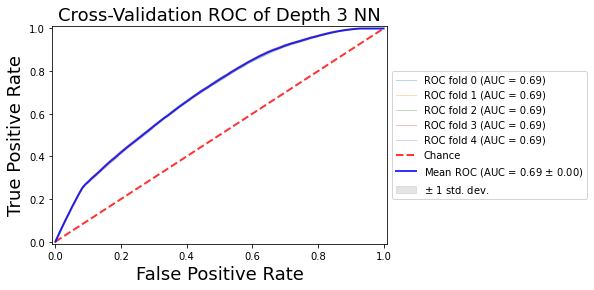

In [40]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

n_classes = 19

acc_per_fold = []
f1_per_fold = []
time_per_fold = []


acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d3.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d3 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    
    decoding_d3, time_mwpm = do_new_decoding(x_test_d3, 3, .03)
    decoding_d3['combine'] = decoding_d3[[0, 1]].values.tolist()
    decoding_d3['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d3 = np.array(decoding_d3[0])

    time_per_fold_mwpm.append(time_mwpm)

    pred_mwpm = mlb_d3.transform(decoding_d3)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb_d3)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))


    #####################################################################################################
    #test the plut decoder for this fold

    lookup_d3 = lookup_decoder(3)

    lookup_d3 = train_plut(lookup_d3, inputs_train, targets[train])

    start = time.time_ns()
    pred_plut_d3 = test_plut(lookup_d3, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d3)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d3, mlb_d3)

    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d3, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold

    model = compile_FFNN_cv_model_DepthThree(3)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model

    history = model.fit(
        inputs_train, targets[train],
        validation_split=.2,
        epochs=200,
        verbose=1)

   # Generate generalization metrics
    scores = model.evaluate(inputs_test, targets[test], verbose=0)

    #get the time to predicting test
    start = time.time_ns()
    predictions_d3 = model.predict(inputs_test) #change here
    end = time.time_ns()
    time_per_fold.append((end - start)/ (10 ** 9))

    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d3.copy() #change here
    pred[pred>=.1]=1 
    pred[pred<.1]=0
    
    if fold_no <5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb_d3)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    #####################################################################################################
    #comput ROC AUC for classes and the mircoaverage
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d3.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d3[:, i]) #change here
        aucs_classes[mlb_d3.classes_[i]].append(auc(fpr[i], tpr[i]))
        
    # Increase fold number
    fold_no = fold_no + 1
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d3.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
    
############print mean and stdev of AUC of each class#####################      
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("#####################################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("#####################################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("#####################################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 3 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# D5 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D5:
* Original:
    - "depth5_all_combos.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d5-1000.csv"
    - "v2samples-d5-10000.csv"
    - "v2samples-d5-100000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d5-1000.csv"
    - "v3samples-d5-10000.csv"

In [76]:
start_time = time.time()
trainData_d5 = pd.read_csv("SAMPLES/v3samples-d5-10000.csv")

trainData_d5 = trainData_d5.applymap(lambda x: add_noise(x,.01)) #was .05

#These four lines remove duplicates
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))
trainData_d5['Labels'] = trainData_d5['Labels'].astype(str)
trainData_d5 = trainData_d5.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))

testData_d5_MWPM = graph_with_errs_d5(trainData_d5)

#transforms the data to encoding for ML
mlb = MultiLabelBinarizer()
mlb.fit(trainData_d5['Labels'])
df = pd.DataFrame(mlb.transform(trainData_d5['Labels']))
df['Labels']= df.values.tolist()
trainData_d5 = trainData_d5.drop(['Labels'], axis=1)
trainData_d5 = pd.concat([df["Labels"], testData_d5_MWPM, trainData_d5], axis=1, ignore_index=True)
trainData_d5.columns = ["Labels","XSyn", "ZSyn","X0","Z1","X2","X3","Z4","X5","Z6","Z7","X8","Z9","X10","Z11","Z12","X13","Z14","X15","Z16","Z17","X18","X19","Z20","X21","X22","Z23"]

y_d5 = trainData_d5["Labels"] 
x_d5 = trainData_d5.drop(["Labels"], axis=1) 

x_d5 = x_d5.replace([-1], 0)
print("Data imported and formatted in %s seconds" % (time.time() - start_time))

Data imported and formatted in 40.07048797607422 seconds


### Fit model on training data

In [77]:
start_time = time.time()
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d5.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d5 = inputs[:,2:]
train_output_d5 = targets

x_train_d5, x_test_d5, Y_train_d5, Y_test_d5 = train_test_split(train_input_d5, train_output_d5, train_size=0.75, shuffle=True)

model_d5 = compile_FFNN_cv_model_DepthFive(5)
print("Fit model on training data")
history = model_d5.fit(
    x=x_train_d5,
    y=Y_train_d5,
    validation_split=.25,
    epochs=500
)
model_d5.summary()
print("Model trained in %s seconds" % (time.time() - start_time))

Fit model on training data
Train on 5625 samples, validate on 1875 samples
Epoch 1/500
5625/5625 [==============================] - 1s 97us/step - loss: 0.4833 - accuracy: 0.8327 - val_loss: 0.2564 - val_accuracy: 0.9288
Epoch 2/500
5625/5625 [==============================] - 0s 75us/step - loss: 0.2542 - accuracy: 0.9290 - val_loss: 0.2540 - val_accuracy: 0.9288
Epoch 3/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.2533 - accuracy: 0.9290 - val_loss: 0.2536 - val_accuracy: 0.9288
Epoch 4/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2529 - accuracy: 0.9290 - val_loss: 0.2534 - val_accuracy: 0.9288
Epoch 5/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2527 - accuracy: 0.9290 - val_loss: 0.2529 - val_accuracy: 0.9288
Epoch 6/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2523 - accuracy: 0.9290 - val_loss: 0.2526 - val_accuracy: 0.9288
Epoch 7/500
5625/5625 [==========================

5625/5625 [==============================] - 0s 74us/step - loss: 0.2052 - accuracy: 0.9300 - val_loss: 0.2074 - val_accuracy: 0.9299
Epoch 57/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.2045 - accuracy: 0.9301 - val_loss: 0.2067 - val_accuracy: 0.9299
Epoch 58/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.2038 - accuracy: 0.9302 - val_loss: 0.2060 - val_accuracy: 0.9301
Epoch 59/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.2031 - accuracy: 0.9302 - val_loss: 0.2053 - val_accuracy: 0.9300
Epoch 60/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.2025 - accuracy: 0.9303 - val_loss: 0.2047 - val_accuracy: 0.9300
Epoch 61/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.2018 - accuracy: 0.9303 - val_loss: 0.2044 - val_accuracy: 0.9303
Epoch 62/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.2011 - accuracy: 0.9304 - val_loss: 0.2040 - val_a

Epoch 112/500
5625/5625 [==============================] - 0s 75us/step - loss: 0.1750 - accuracy: 0.9361 - val_loss: 0.1795 - val_accuracy: 0.9354
Epoch 113/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.1745 - accuracy: 0.9363 - val_loss: 0.1791 - val_accuracy: 0.9356
Epoch 114/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1741 - accuracy: 0.9362 - val_loss: 0.1787 - val_accuracy: 0.9360
Epoch 115/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.1736 - accuracy: 0.9365 - val_loss: 0.1782 - val_accuracy: 0.9361
Epoch 116/500
5625/5625 [==============================] - 0s 76us/step - loss: 0.1731 - accuracy: 0.9367 - val_loss: 0.1786 - val_accuracy: 0.9357
Epoch 117/500
5625/5625 [==============================] - 0s 74us/step - loss: 0.1728 - accuracy: 0.9367 - val_loss: 0.1773 - val_accuracy: 0.9363
Epoch 118/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1722 - accuracy: 0.9369 - val_

5625/5625 [==============================] - 0s 73us/step - loss: 0.1582 - accuracy: 0.9415 - val_loss: 0.1644 - val_accuracy: 0.9405
Epoch 168/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1579 - accuracy: 0.9416 - val_loss: 0.1647 - val_accuracy: 0.9405
Epoch 169/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1578 - accuracy: 0.9416 - val_loss: 0.1646 - val_accuracy: 0.9405
Epoch 170/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1575 - accuracy: 0.9416 - val_loss: 0.1639 - val_accuracy: 0.9405
Epoch 171/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1574 - accuracy: 0.9417 - val_loss: 0.1640 - val_accuracy: 0.9407
Epoch 172/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1572 - accuracy: 0.9420 - val_loss: 0.1640 - val_accuracy: 0.9403
Epoch 173/500
5625/5625 [==============================] - 1s 91us/step - loss: 0.1570 - accuracy: 0.9419 - val_loss: 0.1641 -

5625/5625 [==============================] - 0s 71us/step - loss: 0.1471 - accuracy: 0.9450 - val_loss: 0.1559 - val_accuracy: 0.9434
Epoch 223/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1470 - accuracy: 0.9452 - val_loss: 0.1558 - val_accuracy: 0.9438
Epoch 224/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1468 - accuracy: 0.9451 - val_loss: 0.1558 - val_accuracy: 0.9432
Epoch 225/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1466 - accuracy: 0.9451 - val_loss: 0.1557 - val_accuracy: 0.9437
Epoch 226/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1464 - accuracy: 0.9453 - val_loss: 0.1557 - val_accuracy: 0.9435
Epoch 227/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1462 - accuracy: 0.9452 - val_loss: 0.1552 - val_accuracy: 0.9435
Epoch 228/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1460 - accuracy: 0.9454 - val_loss: 0.1550 -

5625/5625 [==============================] - 0s 71us/step - loss: 0.1382 - accuracy: 0.9479 - val_loss: 0.1500 - val_accuracy: 0.9454
Epoch 278/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1381 - accuracy: 0.9479 - val_loss: 0.1501 - val_accuracy: 0.9456
Epoch 279/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1379 - accuracy: 0.9478 - val_loss: 0.1503 - val_accuracy: 0.9454
Epoch 280/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1378 - accuracy: 0.9479 - val_loss: 0.1499 - val_accuracy: 0.9456
Epoch 281/500
5625/5625 [==============================] - 0s 75us/step - loss: 0.1376 - accuracy: 0.9478 - val_loss: 0.1501 - val_accuracy: 0.9453
Epoch 282/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1375 - accuracy: 0.9479 - val_loss: 0.1497 - val_accuracy: 0.9456
Epoch 283/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1374 - accuracy: 0.9481 - val_loss: 0.1495 -

5625/5625 [==============================] - 0s 71us/step - loss: 0.1313 - accuracy: 0.9499 - val_loss: 0.1469 - val_accuracy: 0.9467
Epoch 333/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1312 - accuracy: 0.9497 - val_loss: 0.1465 - val_accuracy: 0.9466
Epoch 334/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1310 - accuracy: 0.9499 - val_loss: 0.1472 - val_accuracy: 0.9464
Epoch 335/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1310 - accuracy: 0.9499 - val_loss: 0.1463 - val_accuracy: 0.9471
Epoch 336/500
5625/5625 [==============================] - 0s 73us/step - loss: 0.1309 - accuracy: 0.9500 - val_loss: 0.1465 - val_accuracy: 0.9464
Epoch 337/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1308 - accuracy: 0.9501 - val_loss: 0.1463 - val_accuracy: 0.9467
Epoch 338/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1307 - accuracy: 0.9499 - val_loss: 0.1466 -

5625/5625 [==============================] - 0s 74us/step - loss: 0.1259 - accuracy: 0.9514 - val_loss: 0.1446 - val_accuracy: 0.9473
Epoch 388/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1257 - accuracy: 0.9516 - val_loss: 0.1445 - val_accuracy: 0.9470
Epoch 389/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1256 - accuracy: 0.9514 - val_loss: 0.1447 - val_accuracy: 0.9472
Epoch 390/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1256 - accuracy: 0.9514 - val_loss: 0.1446 - val_accuracy: 0.9469
Epoch 391/500
5625/5625 [==============================] - 0s 71us/step - loss: 0.1254 - accuracy: 0.9515 - val_loss: 0.1447 - val_accuracy: 0.9469
Epoch 392/500
5625/5625 [==============================] - 0s 72us/step - loss: 0.1254 - accuracy: 0.9517 - val_loss: 0.1452 - val_accuracy: 0.9469
Epoch 393/500
5625/5625 [==============================] - 0s 70us/step - loss: 0.1254 - accuracy: 0.9517 - val_loss: 0.1445 -

5625/5625 [==============================] - 0s 68us/step - loss: 0.1212 - accuracy: 0.9531 - val_loss: 0.1442 - val_accuracy: 0.9468
Epoch 443/500
5625/5625 [==============================] - 0s 68us/step - loss: 0.1211 - accuracy: 0.9530 - val_loss: 0.1442 - val_accuracy: 0.9471
Epoch 444/500
5625/5625 [==============================] - 0s 68us/step - loss: 0.1210 - accuracy: 0.9531 - val_loss: 0.1441 - val_accuracy: 0.9475
Epoch 445/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1208 - accuracy: 0.9530 - val_loss: 0.1437 - val_accuracy: 0.9475
Epoch 446/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1208 - accuracy: 0.9532 - val_loss: 0.1438 - val_accuracy: 0.9476
Epoch 447/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1207 - accuracy: 0.9529 - val_loss: 0.1438 - val_accuracy: 0.9473
Epoch 448/500
5625/5625 [==============================] - 0s 68us/step - loss: 0.1207 - accuracy: 0.9532 - val_loss: 0.1441 -

5625/5625 [==============================] - 0s 68us/step - loss: 0.1169 - accuracy: 0.9545 - val_loss: 0.1442 - val_accuracy: 0.9466
Epoch 498/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1168 - accuracy: 0.9543 - val_loss: 0.1447 - val_accuracy: 0.9471
Epoch 499/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1166 - accuracy: 0.9545 - val_loss: 0.1437 - val_accuracy: 0.9472
Epoch 500/500
5625/5625 [==============================] - 0s 67us/step - loss: 0.1166 - accuracy: 0.9546 - val_loss: 0.1449 - val_accuracy: 0.9467
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_368 (Dense)            (None, 240)               6000      
_________________________________________________________________
den

In [78]:
predictions_d5 = model_d5.predict(x_test_d5)

y_pred = predictions_d5
y_test = Y_test_d5

y_pred[y_pred>=.5]=1 
y_pred[y_pred<.5]=0

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)-1):
    for j in range(len(y_test[0])-1):
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 1:
            TP += 1
        if y_pred[i][j] == 1 and y_test[i][j] != y_pred[i][j]:
            FP += 1
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 0:
            TN += 1
        if y_pred[i][j] == 0 and y_test[i][j] != y_pred[i][j]:
            FN += 1
            
print("True positive:   " + str(TP) + "\nFalse positive:  " + str(FP) + "\nTrue negative:   " + str(TN) + "\nFalse negative:  " + str(FN))

True positive:   4065
False positive:  1702
True negative:   114457
False negative:  4776


### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

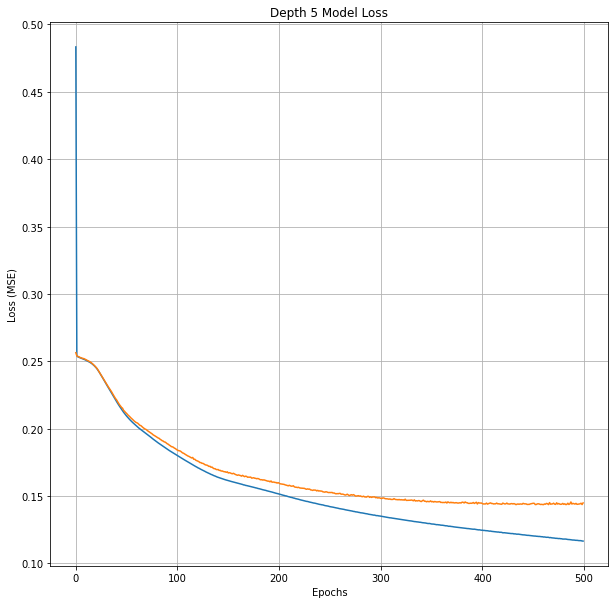

In [79]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 5 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

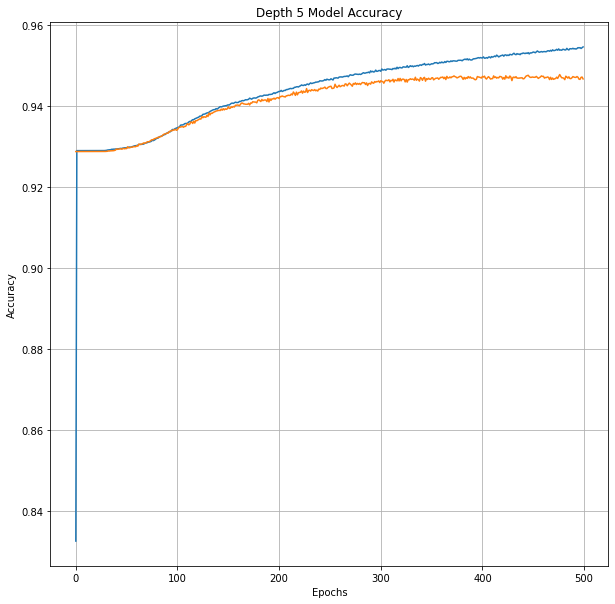

In [80]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 5 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [81]:
model_d5.save("model_d5_v3-10k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 6000 samples, validate on 2000 samples
Epoch 1/800
6000/6000 [==============================] - 1s 91us/step - loss: 0.4216 - accuracy: 0.8535 - val_loss: 0.2670 - val_accuracy: 0.9246
Epoch 2/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2494 - accuracy: 0.9307 - val_loss: 0.2655 - val_accuracy: 0.9246
Epoch 3/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2488 - accuracy: 0.9307 - val_loss: 0.2651 - val_accuracy: 0.9246
Epoch 4/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2485 - accuracy: 0.9307 - val_loss: 0.2649 - val_accuracy: 0.9246
Epoch 5/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.2481 - accuracy: 0.9307 - val_loss: 0.2643 - val_accuracy: 0.9246
Epoch 6/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2478 - accuracy: 0.9307 - val_loss: 0.2641 - 

Epoch 56/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1863 - accuracy: 0.9345 - val_loss: 0.2042 - val_accuracy: 0.9274
Epoch 57/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1853 - accuracy: 0.9347 - val_loss: 0.2034 - val_accuracy: 0.9277
Epoch 58/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1843 - accuracy: 0.9348 - val_loss: 0.2023 - val_accuracy: 0.9280
Epoch 59/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1834 - accuracy: 0.9350 - val_loss: 0.2017 - val_accuracy: 0.9277
Epoch 60/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1825 - accuracy: 0.9353 - val_loss: 0.2008 - val_accuracy: 0.9282
Epoch 61/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1815 - accuracy: 0.9355 - val_loss: 0.2002 - val_accuracy: 0.9286
Epoch 62/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1807 - accuracy: 0.9355 - val_loss: 0

6000/6000 [==============================] - 0s 71us/step - loss: 0.1588 - accuracy: 0.9421 - val_loss: 0.1799 - val_accuracy: 0.9335
Epoch 112/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1585 - accuracy: 0.9422 - val_loss: 0.1800 - val_accuracy: 0.9335
Epoch 113/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1581 - accuracy: 0.9425 - val_loss: 0.1797 - val_accuracy: 0.9336
Epoch 114/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1578 - accuracy: 0.9425 - val_loss: 0.1788 - val_accuracy: 0.9342
Epoch 115/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1575 - accuracy: 0.9425 - val_loss: 0.1788 - val_accuracy: 0.9343
Epoch 116/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1571 - accuracy: 0.9428 - val_loss: 0.1784 - val_accuracy: 0.9342
Epoch 117/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1567 - accuracy: 0.9428 - val_loss: 0.1781 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1455 - accuracy: 0.9467 - val_loss: 0.1681 - val_accuracy: 0.9376
Epoch 167/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1452 - accuracy: 0.9469 - val_loss: 0.1684 - val_accuracy: 0.9377
Epoch 168/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1451 - accuracy: 0.9470 - val_loss: 0.1685 - val_accuracy: 0.9381
Epoch 169/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1448 - accuracy: 0.9469 - val_loss: 0.1685 - val_accuracy: 0.9380
Epoch 170/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1447 - accuracy: 0.9470 - val_loss: 0.1678 - val_accuracy: 0.9381
Epoch 171/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1445 - accuracy: 0.9470 - val_loss: 0.1677 - val_accuracy: 0.9377
Epoch 172/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1444 - accuracy: 0.9471 - val_loss: 0.1677 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1365 - accuracy: 0.9495 - val_loss: 0.1615 - val_accuracy: 0.9410
Epoch 222/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1364 - accuracy: 0.9496 - val_loss: 0.1610 - val_accuracy: 0.9407
Epoch 223/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1363 - accuracy: 0.9497 - val_loss: 0.1608 - val_accuracy: 0.9411
Epoch 224/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1361 - accuracy: 0.9497 - val_loss: 0.1608 - val_accuracy: 0.9407
Epoch 225/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1360 - accuracy: 0.9497 - val_loss: 0.1610 - val_accuracy: 0.9409
Epoch 226/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1358 - accuracy: 0.9497 - val_loss: 0.1603 - val_accuracy: 0.9410
Epoch 227/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1357 - accuracy: 0.9499 - val_loss: 0.1606 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1297 - accuracy: 0.9511 - val_loss: 0.1571 - val_accuracy: 0.9417
Epoch 277/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1296 - accuracy: 0.9514 - val_loss: 0.1563 - val_accuracy: 0.9411
Epoch 278/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1295 - accuracy: 0.9514 - val_loss: 0.1570 - val_accuracy: 0.9421
Epoch 279/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1294 - accuracy: 0.9516 - val_loss: 0.1569 - val_accuracy: 0.9416
Epoch 280/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1293 - accuracy: 0.9513 - val_loss: 0.1563 - val_accuracy: 0.9418
Epoch 281/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1291 - accuracy: 0.9513 - val_loss: 0.1569 - val_accuracy: 0.9418
Epoch 282/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1291 - accuracy: 0.9513 - val_loss: 0.1564 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1243 - accuracy: 0.9524 - val_loss: 0.1546 - val_accuracy: 0.9418
Epoch 332/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1242 - accuracy: 0.9525 - val_loss: 0.1545 - val_accuracy: 0.9428
Epoch 333/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1240 - accuracy: 0.9525 - val_loss: 0.1548 - val_accuracy: 0.9418
Epoch 334/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1241 - accuracy: 0.9525 - val_loss: 0.1538 - val_accuracy: 0.9425
Epoch 335/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1239 - accuracy: 0.9528 - val_loss: 0.1545 - val_accuracy: 0.9427
Epoch 336/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1238 - accuracy: 0.9527 - val_loss: 0.1539 - val_accuracy: 0.9418
Epoch 337/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1237 - accuracy: 0.9527 - val_loss: 0.1541 -

6000/6000 [==============================] - 0s 68us/step - loss: 0.1197 - accuracy: 0.9539 - val_loss: 0.1535 - val_accuracy: 0.9424
Epoch 387/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1197 - accuracy: 0.9536 - val_loss: 0.1534 - val_accuracy: 0.9421
Epoch 388/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1197 - accuracy: 0.9538 - val_loss: 0.1531 - val_accuracy: 0.9421
Epoch 389/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1194 - accuracy: 0.9535 - val_loss: 0.1532 - val_accuracy: 0.9424
Epoch 390/800
6000/6000 [==============================] - 0s 67us/step - loss: 0.1195 - accuracy: 0.9538 - val_loss: 0.1527 - val_accuracy: 0.9425
Epoch 391/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1194 - accuracy: 0.9539 - val_loss: 0.1530 - val_accuracy: 0.9428
Epoch 392/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1193 - accuracy: 0.9537 - val_loss: 0.1538 -

6000/6000 [==============================] - 0s 70us/step - loss: 0.1159 - accuracy: 0.9548 - val_loss: 0.1538 - val_accuracy: 0.9420
Epoch 442/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1158 - accuracy: 0.9551 - val_loss: 0.1535 - val_accuracy: 0.9424
Epoch 443/800
6000/6000 [==============================] - 0s 67us/step - loss: 0.1157 - accuracy: 0.9550 - val_loss: 0.1539 - val_accuracy: 0.9425
Epoch 444/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1157 - accuracy: 0.9551 - val_loss: 0.1532 - val_accuracy: 0.9422
Epoch 445/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1157 - accuracy: 0.9549 - val_loss: 0.1532 - val_accuracy: 0.9413
Epoch 446/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1156 - accuracy: 0.9548 - val_loss: 0.1538 - val_accuracy: 0.9426
Epoch 447/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1155 - accuracy: 0.9550 - val_loss: 0.1531 -

6000/6000 [==============================] - 0s 71us/step - loss: 0.1123 - accuracy: 0.9563 - val_loss: 0.1553 - val_accuracy: 0.9416
Epoch 497/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1122 - accuracy: 0.9564 - val_loss: 0.1554 - val_accuracy: 0.9415
Epoch 498/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1123 - accuracy: 0.9564 - val_loss: 0.1544 - val_accuracy: 0.9411
Epoch 499/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1122 - accuracy: 0.9562 - val_loss: 0.1542 - val_accuracy: 0.9418
Epoch 500/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1121 - accuracy: 0.9563 - val_loss: 0.1543 - val_accuracy: 0.9415
Epoch 501/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1120 - accuracy: 0.9563 - val_loss: 0.1546 - val_accuracy: 0.9414
Epoch 502/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1119 - accuracy: 0.9566 - val_loss: 0.1542 -

6000/6000 [==============================] - 0s 68us/step - loss: 0.1089 - accuracy: 0.9574 - val_loss: 0.1560 - val_accuracy: 0.9415
Epoch 552/800
6000/6000 [==============================] - 0s 67us/step - loss: 0.1089 - accuracy: 0.9574 - val_loss: 0.1554 - val_accuracy: 0.9413
Epoch 553/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1087 - accuracy: 0.9575 - val_loss: 0.1559 - val_accuracy: 0.9409
Epoch 554/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1087 - accuracy: 0.9574 - val_loss: 0.1561 - val_accuracy: 0.9407
Epoch 555/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1086 - accuracy: 0.9578 - val_loss: 0.1560 - val_accuracy: 0.9400
Epoch 556/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1085 - accuracy: 0.9576 - val_loss: 0.1562 - val_accuracy: 0.9409
Epoch 557/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1085 - accuracy: 0.9575 - val_loss: 0.1560 -

6000/6000 [==============================] - 0s 70us/step - loss: 0.1053 - accuracy: 0.9585 - val_loss: 0.1579 - val_accuracy: 0.9406
Epoch 607/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1053 - accuracy: 0.9587 - val_loss: 0.1584 - val_accuracy: 0.9405
Epoch 608/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1052 - accuracy: 0.9587 - val_loss: 0.1575 - val_accuracy: 0.9402
Epoch 609/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.1052 - accuracy: 0.9589 - val_loss: 0.1585 - val_accuracy: 0.9399
Epoch 610/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1051 - accuracy: 0.9588 - val_loss: 0.1590 - val_accuracy: 0.9403
Epoch 611/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1051 - accuracy: 0.9589 - val_loss: 0.1591 - val_accuracy: 0.9402
Epoch 612/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1049 - accuracy: 0.9590 - val_loss: 0.1584 -

6000/6000 [==============================] - 0s 69us/step - loss: 0.1018 - accuracy: 0.9600 - val_loss: 0.1611 - val_accuracy: 0.9405
Epoch 662/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1017 - accuracy: 0.9602 - val_loss: 0.1607 - val_accuracy: 0.9404
Epoch 663/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1018 - accuracy: 0.9601 - val_loss: 0.1606 - val_accuracy: 0.9406
Epoch 664/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1017 - accuracy: 0.9599 - val_loss: 0.1607 - val_accuracy: 0.9398
Epoch 665/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.1015 - accuracy: 0.9602 - val_loss: 0.1612 - val_accuracy: 0.9398
Epoch 666/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1014 - accuracy: 0.9602 - val_loss: 0.1620 - val_accuracy: 0.9399
Epoch 667/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.1014 - accuracy: 0.9602 - val_loss: 0.1602 -

6000/6000 [==============================] - 0s 68us/step - loss: 0.0982 - accuracy: 0.9616 - val_loss: 0.1639 - val_accuracy: 0.9393
Epoch 717/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.0982 - accuracy: 0.9614 - val_loss: 0.1653 - val_accuracy: 0.9383
Epoch 718/800
6000/6000 [==============================] - 0s 68us/step - loss: 0.0980 - accuracy: 0.9616 - val_loss: 0.1647 - val_accuracy: 0.9390
Epoch 719/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0980 - accuracy: 0.9615 - val_loss: 0.1652 - val_accuracy: 0.9395
Epoch 720/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.0980 - accuracy: 0.9616 - val_loss: 0.1645 - val_accuracy: 0.9398
Epoch 721/800
6000/6000 [==============================] - 0s 70us/step - loss: 0.0978 - accuracy: 0.9614 - val_loss: 0.1650 - val_accuracy: 0.9398
Epoch 722/800
6000/6000 [==============================] - 0s 69us/step - loss: 0.0977 - accuracy: 0.9616 - val_loss: 0.1665 -

6000/6000 [==============================] - 1s 93us/step - loss: 0.0945 - accuracy: 0.9628 - val_loss: 0.1708 - val_accuracy: 0.9391
Epoch 772/800
6000/6000 [==============================] - 1s 87us/step - loss: 0.0944 - accuracy: 0.9632 - val_loss: 0.1683 - val_accuracy: 0.9385
Epoch 773/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.0944 - accuracy: 0.9630 - val_loss: 0.1687 - val_accuracy: 0.9393
Epoch 774/800
6000/6000 [==============================] - 1s 85us/step - loss: 0.0941 - accuracy: 0.9630 - val_loss: 0.1694 - val_accuracy: 0.9374
Epoch 775/800
6000/6000 [==============================] - 0s 83us/step - loss: 0.0943 - accuracy: 0.9630 - val_loss: 0.1688 - val_accuracy: 0.9399
Epoch 776/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.0941 - accuracy: 0.9629 - val_loss: 0.1709 - val_accuracy: 0.9377
Epoch 777/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.0940 - accuracy: 0.9633 - val_loss: 0.1706 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 2 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 91us/step - loss: 0.4401 - accuracy: 0.8509 - val_loss: 0.2687 - val_accuracy: 0.9250
Epoch 2/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2520 - accuracy: 0.9304 - val_loss: 0.2667 - val_accuracy: 0.9250
Epoch 3/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2510 - accuracy: 0.9304 - val_loss: 0.2660 - val_accuracy: 0.9250
Epoch 4/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2504 - accuracy: 0.9304 - val_loss: 0.2653 - val_accuracy: 0.9250
Epoch 5/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2499 - accuracy: 0.9304 - val_loss: 0.2648 - val_accuracy: 0.9250
Epoch 6/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2494 - accuracy: 0.9304 - val_loss: 0.2644 - 

Epoch 56/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1901 - accuracy: 0.9335 - val_loss: 0.2062 - val_accuracy: 0.9279
Epoch 57/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1892 - accuracy: 0.9336 - val_loss: 0.2051 - val_accuracy: 0.9283
Epoch 58/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1883 - accuracy: 0.9338 - val_loss: 0.2047 - val_accuracy: 0.9286
Epoch 59/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1874 - accuracy: 0.9340 - val_loss: 0.2039 - val_accuracy: 0.9289
Epoch 60/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1865 - accuracy: 0.9343 - val_loss: 0.2032 - val_accuracy: 0.9287
Epoch 61/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1857 - accuracy: 0.9345 - val_loss: 0.2023 - val_accuracy: 0.9286
Epoch 62/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1849 - accuracy: 0.9345 - val_loss: 0

6000/6000 [==============================] - 0s 71us/step - loss: 0.1590 - accuracy: 0.9422 - val_loss: 0.1777 - val_accuracy: 0.9357
Epoch 112/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1586 - accuracy: 0.9424 - val_loss: 0.1775 - val_accuracy: 0.9353
Epoch 113/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1584 - accuracy: 0.9424 - val_loss: 0.1772 - val_accuracy: 0.9361
Epoch 114/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1581 - accuracy: 0.9425 - val_loss: 0.1775 - val_accuracy: 0.9355
Epoch 115/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1578 - accuracy: 0.9426 - val_loss: 0.1766 - val_accuracy: 0.9362
Epoch 116/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1575 - accuracy: 0.9428 - val_loss: 0.1762 - val_accuracy: 0.9362
Epoch 117/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1573 - accuracy: 0.9426 - val_loss: 0.1768 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1479 - accuracy: 0.9462 - val_loss: 0.1682 - val_accuracy: 0.9384
Epoch 167/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1478 - accuracy: 0.9459 - val_loss: 0.1689 - val_accuracy: 0.9383
Epoch 168/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1476 - accuracy: 0.9460 - val_loss: 0.1681 - val_accuracy: 0.9386
Epoch 169/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1474 - accuracy: 0.9461 - val_loss: 0.1679 - val_accuracy: 0.9386
Epoch 170/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1473 - accuracy: 0.9462 - val_loss: 0.1681 - val_accuracy: 0.9382
Epoch 171/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1471 - accuracy: 0.9461 - val_loss: 0.1680 - val_accuracy: 0.9382
Epoch 172/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1469 - accuracy: 0.9462 - val_loss: 0.1678 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1389 - accuracy: 0.9488 - val_loss: 0.1613 - val_accuracy: 0.9405
Epoch 222/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1387 - accuracy: 0.9489 - val_loss: 0.1617 - val_accuracy: 0.9405
Epoch 223/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1386 - accuracy: 0.9488 - val_loss: 0.1611 - val_accuracy: 0.9409
Epoch 224/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1384 - accuracy: 0.9489 - val_loss: 0.1610 - val_accuracy: 0.9406
Epoch 225/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1382 - accuracy: 0.9491 - val_loss: 0.1614 - val_accuracy: 0.9406
Epoch 226/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1381 - accuracy: 0.9490 - val_loss: 0.1606 - val_accuracy: 0.9406
Epoch 227/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1379 - accuracy: 0.9489 - val_loss: 0.1610 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1312 - accuracy: 0.9509 - val_loss: 0.1562 - val_accuracy: 0.9419
Epoch 277/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1311 - accuracy: 0.9510 - val_loss: 0.1562 - val_accuracy: 0.9415
Epoch 278/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1310 - accuracy: 0.9509 - val_loss: 0.1567 - val_accuracy: 0.9417
Epoch 279/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1309 - accuracy: 0.9509 - val_loss: 0.1562 - val_accuracy: 0.9420
Epoch 280/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1308 - accuracy: 0.9510 - val_loss: 0.1555 - val_accuracy: 0.9422
Epoch 281/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1306 - accuracy: 0.9509 - val_loss: 0.1561 - val_accuracy: 0.9418
Epoch 282/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1305 - accuracy: 0.9511 - val_loss: 0.1552 -

6000/6000 [==============================] - 0s 71us/step - loss: 0.1257 - accuracy: 0.9524 - val_loss: 0.1535 - val_accuracy: 0.9426
Epoch 332/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1255 - accuracy: 0.9525 - val_loss: 0.1545 - val_accuracy: 0.9427
Epoch 333/800
6000/6000 [==============================] - ETA: 0s - loss: 0.1255 - accuracy: 0.95 - 0s 72us/step - loss: 0.1256 - accuracy: 0.9523 - val_loss: 0.1545 - val_accuracy: 0.9426
Epoch 334/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1255 - accuracy: 0.9524 - val_loss: 0.1539 - val_accuracy: 0.9430
Epoch 335/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1255 - accuracy: 0.9524 - val_loss: 0.1535 - val_accuracy: 0.9423
Epoch 336/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1252 - accuracy: 0.9522 - val_loss: 0.1539 - val_accuracy: 0.9427
Epoch 337/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.12

Epoch 386/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1212 - accuracy: 0.9534 - val_loss: 0.1526 - val_accuracy: 0.9423
Epoch 387/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1212 - accuracy: 0.9535 - val_loss: 0.1529 - val_accuracy: 0.9428
Epoch 388/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1210 - accuracy: 0.9536 - val_loss: 0.1525 - val_accuracy: 0.9432
Epoch 389/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1210 - accuracy: 0.9538 - val_loss: 0.1532 - val_accuracy: 0.9432
Epoch 390/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1209 - accuracy: 0.9536 - val_loss: 0.1528 - val_accuracy: 0.9426
Epoch 391/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1208 - accuracy: 0.9536 - val_loss: 0.1533 - val_accuracy: 0.9424
Epoch 392/800
6000/6000 [==============================] - 1s 84us/step - loss: 0.1208 - accuracy: 0.9536 - val_

6000/6000 [==============================] - 0s 73us/step - loss: 0.1174 - accuracy: 0.9546 - val_loss: 0.1524 - val_accuracy: 0.9426
Epoch 442/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1172 - accuracy: 0.9546 - val_loss: 0.1530 - val_accuracy: 0.9424
Epoch 443/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1172 - accuracy: 0.9547 - val_loss: 0.1532 - val_accuracy: 0.9420
Epoch 444/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1171 - accuracy: 0.9548 - val_loss: 0.1529 - val_accuracy: 0.9424
Epoch 445/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1170 - accuracy: 0.9547 - val_loss: 0.1535 - val_accuracy: 0.9424
Epoch 446/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1170 - accuracy: 0.9548 - val_loss: 0.1525 - val_accuracy: 0.9423
Epoch 447/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1170 - accuracy: 0.9547 - val_loss: 0.1535 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1138 - accuracy: 0.9558 - val_loss: 0.1535 - val_accuracy: 0.9418
Epoch 496/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1138 - accuracy: 0.9558 - val_loss: 0.1537 - val_accuracy: 0.9428
Epoch 497/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1137 - accuracy: 0.9560 - val_loss: 0.1533 - val_accuracy: 0.9423
Epoch 498/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1136 - accuracy: 0.9558 - val_loss: 0.1536 - val_accuracy: 0.9425
Epoch 499/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1135 - accuracy: 0.9560 - val_loss: 0.1535 - val_accuracy: 0.9419
Epoch 500/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1135 - accuracy: 0.9560 - val_loss: 0.1535 - val_accuracy: 0.9421
Epoch 501/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1135 - accuracy: 0.9557 - val_loss: 0.1537 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1104 - accuracy: 0.9570 - val_loss: 0.1549 - val_accuracy: 0.9417
Epoch 551/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1102 - accuracy: 0.9570 - val_loss: 0.1548 - val_accuracy: 0.9418
Epoch 552/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1103 - accuracy: 0.9569 - val_loss: 0.1550 - val_accuracy: 0.9412
Epoch 553/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1102 - accuracy: 0.9571 - val_loss: 0.1550 - val_accuracy: 0.9420
Epoch 554/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1101 - accuracy: 0.9572 - val_loss: 0.1543 - val_accuracy: 0.9422
Epoch 555/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1101 - accuracy: 0.9571 - val_loss: 0.1545 - val_accuracy: 0.9421
Epoch 556/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1100 - accuracy: 0.9570 - val_loss: 0.1545 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1068 - accuracy: 0.9582 - val_loss: 0.1560 - val_accuracy: 0.9415
Epoch 606/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1068 - accuracy: 0.9581 - val_loss: 0.1559 - val_accuracy: 0.9413
Epoch 607/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1574 - val_accuracy: 0.9420
Epoch 608/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1067 - accuracy: 0.9582 - val_loss: 0.1573 - val_accuracy: 0.9410
Epoch 609/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1067 - accuracy: 0.9582 - val_loss: 0.1565 - val_accuracy: 0.9411
Epoch 610/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1066 - accuracy: 0.9582 - val_loss: 0.1559 - val_accuracy: 0.9414
Epoch 611/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1065 - accuracy: 0.9582 - val_loss: 0.1569 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1033 - accuracy: 0.9594 - val_loss: 0.1592 - val_accuracy: 0.9405
Epoch 661/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1032 - accuracy: 0.9598 - val_loss: 0.1587 - val_accuracy: 0.9415
Epoch 662/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1032 - accuracy: 0.9594 - val_loss: 0.1599 - val_accuracy: 0.9408
Epoch 663/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1031 - accuracy: 0.9596 - val_loss: 0.1590 - val_accuracy: 0.9419
Epoch 664/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1030 - accuracy: 0.9598 - val_loss: 0.1597 - val_accuracy: 0.9396
Epoch 665/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1031 - accuracy: 0.9594 - val_loss: 0.1599 - val_accuracy: 0.9407
Epoch 666/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1029 - accuracy: 0.9598 - val_loss: 0.1609 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0997 - accuracy: 0.9609 - val_loss: 0.1622 - val_accuracy: 0.9402
Epoch 716/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0997 - accuracy: 0.9610 - val_loss: 0.1619 - val_accuracy: 0.9410
Epoch 717/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0995 - accuracy: 0.9611 - val_loss: 0.1619 - val_accuracy: 0.9395
Epoch 718/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.0996 - accuracy: 0.9609 - val_loss: 0.1628 - val_accuracy: 0.9406
Epoch 719/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0995 - accuracy: 0.9614 - val_loss: 0.1626 - val_accuracy: 0.9410
Epoch 720/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0994 - accuracy: 0.9612 - val_loss: 0.1621 - val_accuracy: 0.9396
Epoch 721/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0992 - accuracy: 0.9613 - val_loss: 0.1633 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0961 - accuracy: 0.9625 - val_loss: 0.1660 - val_accuracy: 0.9396
Epoch 771/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.0958 - accuracy: 0.9625 - val_loss: 0.1659 - val_accuracy: 0.9403
Epoch 772/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0957 - accuracy: 0.9629 - val_loss: 0.1669 - val_accuracy: 0.9391
Epoch 773/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0959 - accuracy: 0.9625 - val_loss: 0.1666 - val_accuracy: 0.9392
Epoch 774/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0955 - accuracy: 0.9630 - val_loss: 0.1660 - val_accuracy: 0.9399
Epoch 775/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0956 - accuracy: 0.9626 - val_loss: 0.1669 - val_accuracy: 0.9398
Epoch 776/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0956 - accuracy: 0.9628 - val_loss: 0.1668 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 92us/step - loss: 0.4272 - accuracy: 0.8553 - val_loss: 0.2680 - val_accuracy: 0.9248
Epoch 2/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.2517 - accuracy: 0.9302 - val_loss: 0.2664 - val_accuracy: 0.9248
Epoch 3/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2510 - accuracy: 0.9302 - val_loss: 0.2658 - val_accuracy: 0.9248
Epoch 4/800
6000/6000 [==============================] - 1s 94us/step - loss: 0.2505 - accuracy: 0.9302 - val_loss: 0.2655 - val_accuracy: 0.9248
Epoch 5/800
6000/6000 [==============================] - 1s 87us/step - loss: 0.2501 - accuracy: 0.9302 - val_loss: 0.2649 - val_accuracy: 0.9248
Epoch 6/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.2497 - accuracy: 0.9302 - val_loss: 0.2644 - 

Epoch 56/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1913 - accuracy: 0.9328 - val_loss: 0.2061 - val_accuracy: 0.9272
Epoch 57/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1902 - accuracy: 0.9331 - val_loss: 0.2048 - val_accuracy: 0.9269
Epoch 58/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1891 - accuracy: 0.9332 - val_loss: 0.2037 - val_accuracy: 0.9271
Epoch 59/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1880 - accuracy: 0.9333 - val_loss: 0.2026 - val_accuracy: 0.9274
Epoch 60/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1870 - accuracy: 0.9335 - val_loss: 0.2016 - val_accuracy: 0.9276
Epoch 61/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1860 - accuracy: 0.9337 - val_loss: 0.2010 - val_accuracy: 0.9274
Epoch 62/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1851 - accuracy: 0.9338 - val_loss: 0

6000/6000 [==============================] - 0s 73us/step - loss: 0.1596 - accuracy: 0.9418 - val_loss: 0.1777 - val_accuracy: 0.9352
Epoch 112/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1593 - accuracy: 0.9419 - val_loss: 0.1772 - val_accuracy: 0.9352
Epoch 113/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1589 - accuracy: 0.9422 - val_loss: 0.1769 - val_accuracy: 0.9353
Epoch 114/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1586 - accuracy: 0.9422 - val_loss: 0.1764 - val_accuracy: 0.9356
Epoch 115/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1584 - accuracy: 0.9425 - val_loss: 0.1762 - val_accuracy: 0.9355
Epoch 116/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1580 - accuracy: 0.9425 - val_loss: 0.1758 - val_accuracy: 0.9357
Epoch 117/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1576 - accuracy: 0.9425 - val_loss: 0.1759 -

6000/6000 [==============================] - 0s 79us/step - loss: 0.1463 - accuracy: 0.9462 - val_loss: 0.1672 - val_accuracy: 0.9387
Epoch 167/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1461 - accuracy: 0.9463 - val_loss: 0.1661 - val_accuracy: 0.9395
Epoch 168/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1459 - accuracy: 0.9463 - val_loss: 0.1661 - val_accuracy: 0.9392
Epoch 169/800
6000/6000 [==============================] - 1s 101us/step - loss: 0.1458 - accuracy: 0.9463 - val_loss: 0.1661 - val_accuracy: 0.9392
Epoch 170/800
6000/6000 [==============================] - 1s 84us/step - loss: 0.1456 - accuracy: 0.9464 - val_loss: 0.1659 - val_accuracy: 0.9393
Epoch 171/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1454 - accuracy: 0.9465 - val_loss: 0.1654 - val_accuracy: 0.9394
Epoch 172/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1452 - accuracy: 0.9465 - val_loss: 0.1653 

6000/6000 [==============================] - 0s 72us/step - loss: 0.1377 - accuracy: 0.9488 - val_loss: 0.1607 - val_accuracy: 0.9409
Epoch 222/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1377 - accuracy: 0.9488 - val_loss: 0.1601 - val_accuracy: 0.9414
Epoch 223/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1374 - accuracy: 0.9489 - val_loss: 0.1598 - val_accuracy: 0.9414
Epoch 224/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1372 - accuracy: 0.9489 - val_loss: 0.1595 - val_accuracy: 0.9413
Epoch 225/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1371 - accuracy: 0.9489 - val_loss: 0.1604 - val_accuracy: 0.9414
Epoch 226/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1370 - accuracy: 0.9490 - val_loss: 0.1596 - val_accuracy: 0.9413
Epoch 227/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1369 - accuracy: 0.9490 - val_loss: 0.1596 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1312 - accuracy: 0.9504 - val_loss: 0.1561 - val_accuracy: 0.9424
Epoch 277/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1311 - accuracy: 0.9506 - val_loss: 0.1560 - val_accuracy: 0.9422
Epoch 278/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1311 - accuracy: 0.9503 - val_loss: 0.1560 - val_accuracy: 0.9426
Epoch 279/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1309 - accuracy: 0.9504 - val_loss: 0.1563 - val_accuracy: 0.9424
Epoch 280/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1308 - accuracy: 0.9505 - val_loss: 0.1565 - val_accuracy: 0.9428
Epoch 281/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1307 - accuracy: 0.9507 - val_loss: 0.1565 - val_accuracy: 0.9420
Epoch 282/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1307 - accuracy: 0.9505 - val_loss: 0.1563 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1264 - accuracy: 0.9517 - val_loss: 0.1548 - val_accuracy: 0.9426
Epoch 332/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1263 - accuracy: 0.9519 - val_loss: 0.1556 - val_accuracy: 0.9422
Epoch 333/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1263 - accuracy: 0.9518 - val_loss: 0.1553 - val_accuracy: 0.9420
Epoch 334/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1263 - accuracy: 0.9521 - val_loss: 0.1550 - val_accuracy: 0.9418
Epoch 335/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1261 - accuracy: 0.9517 - val_loss: 0.1549 - val_accuracy: 0.9429
Epoch 336/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1260 - accuracy: 0.9519 - val_loss: 0.1546 - val_accuracy: 0.9421
Epoch 337/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1259 - accuracy: 0.9518 - val_loss: 0.1552 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1222 - accuracy: 0.9531 - val_loss: 0.1539 - val_accuracy: 0.9413
Epoch 387/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1221 - accuracy: 0.9530 - val_loss: 0.1544 - val_accuracy: 0.9425
Epoch 388/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1221 - accuracy: 0.9530 - val_loss: 0.1543 - val_accuracy: 0.9422
Epoch 389/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1220 - accuracy: 0.9530 - val_loss: 0.1540 - val_accuracy: 0.9418
Epoch 390/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1218 - accuracy: 0.9532 - val_loss: 0.1544 - val_accuracy: 0.9419
Epoch 391/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1217 - accuracy: 0.9533 - val_loss: 0.1543 - val_accuracy: 0.9422
Epoch 392/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1217 - accuracy: 0.9532 - val_loss: 0.1538 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1183 - accuracy: 0.9545 - val_loss: 0.1543 - val_accuracy: 0.9419
Epoch 442/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1181 - accuracy: 0.9543 - val_loss: 0.1542 - val_accuracy: 0.9422
Epoch 443/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1181 - accuracy: 0.9543 - val_loss: 0.1543 - val_accuracy: 0.9420
Epoch 444/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1180 - accuracy: 0.9544 - val_loss: 0.1547 - val_accuracy: 0.9423
Epoch 445/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1179 - accuracy: 0.9543 - val_loss: 0.1545 - val_accuracy: 0.9419
Epoch 446/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1179 - accuracy: 0.9544 - val_loss: 0.1549 - val_accuracy: 0.9417
Epoch 447/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1179 - accuracy: 0.9543 - val_loss: 0.1542 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1145 - accuracy: 0.9556 - val_loss: 0.1552 - val_accuracy: 0.9420
Epoch 497/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1143 - accuracy: 0.9556 - val_loss: 0.1550 - val_accuracy: 0.9423
Epoch 498/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1143 - accuracy: 0.9556 - val_loss: 0.1551 - val_accuracy: 0.9411
Epoch 499/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1142 - accuracy: 0.9556 - val_loss: 0.1550 - val_accuracy: 0.9420
Epoch 500/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1141 - accuracy: 0.9555 - val_loss: 0.1547 - val_accuracy: 0.9418
Epoch 501/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1142 - accuracy: 0.9555 - val_loss: 0.1551 - val_accuracy: 0.9420
Epoch 502/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1139 - accuracy: 0.9557 - val_loss: 0.1554 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1108 - accuracy: 0.9568 - val_loss: 0.1569 - val_accuracy: 0.9409
Epoch 552/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1106 - accuracy: 0.9568 - val_loss: 0.1575 - val_accuracy: 0.9409
Epoch 553/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1106 - accuracy: 0.9567 - val_loss: 0.1575 - val_accuracy: 0.9413
Epoch 554/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1106 - accuracy: 0.9569 - val_loss: 0.1567 - val_accuracy: 0.9414
Epoch 555/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1105 - accuracy: 0.9569 - val_loss: 0.1573 - val_accuracy: 0.9409
Epoch 556/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1105 - accuracy: 0.9569 - val_loss: 0.1572 - val_accuracy: 0.9415
Epoch 557/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1103 - accuracy: 0.9572 - val_loss: 0.1574 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1071 - accuracy: 0.9581 - val_loss: 0.1583 - val_accuracy: 0.9407
Epoch 607/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1069 - accuracy: 0.9584 - val_loss: 0.1586 - val_accuracy: 0.9416
Epoch 608/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1070 - accuracy: 0.9583 - val_loss: 0.1583 - val_accuracy: 0.9407
Epoch 609/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1592 - val_accuracy: 0.9406
Epoch 610/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1599 - val_accuracy: 0.9408
Epoch 611/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1591 - val_accuracy: 0.9410
Epoch 612/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1066 - accuracy: 0.9582 - val_loss: 0.1609 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1034 - accuracy: 0.9595 - val_loss: 0.1624 - val_accuracy: 0.9401
Epoch 662/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1034 - accuracy: 0.9596 - val_loss: 0.1625 - val_accuracy: 0.9399
Epoch 663/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1032 - accuracy: 0.9599 - val_loss: 0.1619 - val_accuracy: 0.9399
Epoch 664/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1030 - accuracy: 0.9595 - val_loss: 0.1616 - val_accuracy: 0.9403
Epoch 665/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1030 - accuracy: 0.9599 - val_loss: 0.1618 - val_accuracy: 0.9400
Epoch 666/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1030 - accuracy: 0.9596 - val_loss: 0.1631 - val_accuracy: 0.9400
Epoch 667/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1029 - accuracy: 0.9599 - val_loss: 0.1622 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0994 - accuracy: 0.9613 - val_loss: 0.1651 - val_accuracy: 0.9399
Epoch 717/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.0994 - accuracy: 0.9611 - val_loss: 0.1655 - val_accuracy: 0.9399
Epoch 718/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.0993 - accuracy: 0.9612 - val_loss: 0.1659 - val_accuracy: 0.9400
Epoch 719/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0993 - accuracy: 0.9612 - val_loss: 0.1660 - val_accuracy: 0.9398
Epoch 720/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.0992 - accuracy: 0.9614 - val_loss: 0.1664 - val_accuracy: 0.9396
Epoch 721/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0991 - accuracy: 0.9612 - val_loss: 0.1680 - val_accuracy: 0.9389
Epoch 722/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0990 - accuracy: 0.9613 - val_loss: 0.1672 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0956 - accuracy: 0.9627 - val_loss: 0.1713 - val_accuracy: 0.9395
Epoch 772/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0954 - accuracy: 0.9627 - val_loss: 0.1715 - val_accuracy: 0.9394
Epoch 773/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0955 - accuracy: 0.9626 - val_loss: 0.1713 - val_accuracy: 0.9396
Epoch 774/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0954 - accuracy: 0.9627 - val_loss: 0.1704 - val_accuracy: 0.9383
Epoch 775/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0953 - accuracy: 0.9629 - val_loss: 0.1704 - val_accuracy: 0.9382
Epoch 776/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.0950 - accuracy: 0.9628 - val_loss: 0.1713 - val_accuracy: 0.9384
Epoch 777/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.0950 - accuracy: 0.9628 - val_loss: 0.1718 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 4 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 93us/step - loss: 0.3886 - accuracy: 0.8688 - val_loss: 0.2650 - val_accuracy: 0.9250
Epoch 2/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2491 - accuracy: 0.9306 - val_loss: 0.2642 - val_accuracy: 0.9250
Epoch 3/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.2486 - accuracy: 0.9306 - val_loss: 0.2638 - val_accuracy: 0.9250
Epoch 4/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2483 - accuracy: 0.9306 - val_loss: 0.2634 - val_accuracy: 0.9250
Epoch 5/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2480 - accuracy: 0.9306 - val_loss: 0.2631 - val_accuracy: 0.9250
Epoch 6/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.2477 - accuracy: 0.9306 - val_loss: 0.2629 - 

Epoch 56/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1870 - accuracy: 0.9333 - val_loss: 0.2025 - val_accuracy: 0.9273
Epoch 57/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1858 - accuracy: 0.9335 - val_loss: 0.2016 - val_accuracy: 0.9277
Epoch 58/800
6000/6000 [==============================] - 0s 71us/step - loss: 0.1848 - accuracy: 0.9338 - val_loss: 0.2008 - val_accuracy: 0.9276
Epoch 59/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1838 - accuracy: 0.9341 - val_loss: 0.2001 - val_accuracy: 0.9280
Epoch 60/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1828 - accuracy: 0.9342 - val_loss: 0.1989 - val_accuracy: 0.9280
Epoch 61/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1819 - accuracy: 0.9344 - val_loss: 0.1982 - val_accuracy: 0.9282
Epoch 62/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1811 - accuracy: 0.9347 - val_loss: 0

6000/6000 [==============================] - 0s 74us/step - loss: 0.1580 - accuracy: 0.9423 - val_loss: 0.1766 - val_accuracy: 0.9349
Epoch 112/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1576 - accuracy: 0.9424 - val_loss: 0.1766 - val_accuracy: 0.9349
Epoch 113/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1573 - accuracy: 0.9425 - val_loss: 0.1766 - val_accuracy: 0.9346
Epoch 114/800
6000/6000 [==============================] - 1s 89us/step - loss: 0.1568 - accuracy: 0.9427 - val_loss: 0.1758 - val_accuracy: 0.9352
Epoch 115/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1564 - accuracy: 0.9427 - val_loss: 0.1758 - val_accuracy: 0.9356
Epoch 116/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1561 - accuracy: 0.9429 - val_loss: 0.1754 - val_accuracy: 0.9356
Epoch 117/800
6000/6000 [==============================] - 0s 83us/step - loss: 0.1557 - accuracy: 0.9432 - val_loss: 0.1749 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1453 - accuracy: 0.9470 - val_loss: 0.1675 - val_accuracy: 0.9385
Epoch 167/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1452 - accuracy: 0.9469 - val_loss: 0.1669 - val_accuracy: 0.9389
Epoch 168/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1450 - accuracy: 0.9470 - val_loss: 0.1672 - val_accuracy: 0.9390
Epoch 169/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1448 - accuracy: 0.9470 - val_loss: 0.1664 - val_accuracy: 0.9389
Epoch 170/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1446 - accuracy: 0.9473 - val_loss: 0.1665 - val_accuracy: 0.9385
Epoch 171/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1445 - accuracy: 0.9473 - val_loss: 0.1662 - val_accuracy: 0.9387
Epoch 172/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1443 - accuracy: 0.9473 - val_loss: 0.1663 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1365 - accuracy: 0.9492 - val_loss: 0.1611 - val_accuracy: 0.9404
Epoch 222/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1363 - accuracy: 0.9493 - val_loss: 0.1609 - val_accuracy: 0.9407
Epoch 223/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1362 - accuracy: 0.9496 - val_loss: 0.1608 - val_accuracy: 0.9406
Epoch 224/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1361 - accuracy: 0.9496 - val_loss: 0.1612 - val_accuracy: 0.9404
Epoch 225/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1359 - accuracy: 0.9495 - val_loss: 0.1605 - val_accuracy: 0.9406
Epoch 226/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1358 - accuracy: 0.9497 - val_loss: 0.1604 - val_accuracy: 0.9404
Epoch 227/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1357 - accuracy: 0.9495 - val_loss: 0.1606 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.1299 - accuracy: 0.9512 - val_loss: 0.1574 - val_accuracy: 0.9416
Epoch 277/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1297 - accuracy: 0.9510 - val_loss: 0.1569 - val_accuracy: 0.9413
Epoch 278/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1297 - accuracy: 0.9512 - val_loss: 0.1573 - val_accuracy: 0.9410
Epoch 279/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1296 - accuracy: 0.9512 - val_loss: 0.1574 - val_accuracy: 0.9411
Epoch 280/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1295 - accuracy: 0.9514 - val_loss: 0.1568 - val_accuracy: 0.9413
Epoch 281/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1294 - accuracy: 0.9513 - val_loss: 0.1571 - val_accuracy: 0.9419
Epoch 282/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1293 - accuracy: 0.9515 - val_loss: 0.1569 -

6000/6000 [==============================] - 0s 77us/step - loss: 0.1247 - accuracy: 0.9527 - val_loss: 0.1554 - val_accuracy: 0.9416
Epoch 332/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1246 - accuracy: 0.9525 - val_loss: 0.1557 - val_accuracy: 0.9417
Epoch 333/800
6000/6000 [==============================] - 0s 72us/step - loss: 0.1245 - accuracy: 0.9527 - val_loss: 0.1551 - val_accuracy: 0.9416
Epoch 334/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1245 - accuracy: 0.9527 - val_loss: 0.1558 - val_accuracy: 0.9419
Epoch 335/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1244 - accuracy: 0.9527 - val_loss: 0.1556 - val_accuracy: 0.9418
Epoch 336/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1243 - accuracy: 0.9529 - val_loss: 0.1553 - val_accuracy: 0.9420
Epoch 337/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1242 - accuracy: 0.9526 - val_loss: 0.1557 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1204 - accuracy: 0.9539 - val_loss: 0.1547 - val_accuracy: 0.9415
Epoch 387/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1203 - accuracy: 0.9538 - val_loss: 0.1546 - val_accuracy: 0.9414
Epoch 388/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1203 - accuracy: 0.9537 - val_loss: 0.1552 - val_accuracy: 0.9411
Epoch 389/800
6000/6000 [==============================] - 1s 104us/step - loss: 0.1201 - accuracy: 0.9539 - val_loss: 0.1556 - val_accuracy: 0.9414
Epoch 390/800
6000/6000 [==============================] - 1s 102us/step - loss: 0.1201 - accuracy: 0.9538 - val_loss: 0.1555 - val_accuracy: 0.9420
Epoch 391/800
6000/6000 [==============================] - 1s 101us/step - loss: 0.1199 - accuracy: 0.9542 - val_loss: 0.1552 - val_accuracy: 0.9418
Epoch 392/800
6000/6000 [==============================] - 1s 102us/step - loss: 0.1200 - accuracy: 0.9539 - val_loss: 0.15

6000/6000 [==============================] - 1s 89us/step - loss: 0.1164 - accuracy: 0.9550 - val_loss: 0.1544 - val_accuracy: 0.9419
Epoch 442/800
6000/6000 [==============================] - 1s 86us/step - loss: 0.1164 - accuracy: 0.9550 - val_loss: 0.1551 - val_accuracy: 0.9411
Epoch 443/800
6000/6000 [==============================] - 1s 88us/step - loss: 0.1163 - accuracy: 0.9549 - val_loss: 0.1551 - val_accuracy: 0.9419
Epoch 444/800
6000/6000 [==============================] - 1s 90us/step - loss: 0.1161 - accuracy: 0.9551 - val_loss: 0.1550 - val_accuracy: 0.9421
Epoch 445/800
6000/6000 [==============================] - 1s 91us/step - loss: 0.1162 - accuracy: 0.9552 - val_loss: 0.1552 - val_accuracy: 0.9417
Epoch 446/800
6000/6000 [==============================] - 1s 88us/step - loss: 0.1160 - accuracy: 0.9551 - val_loss: 0.1557 - val_accuracy: 0.9414
Epoch 447/800
6000/6000 [==============================] - 1s 89us/step - loss: 0.1160 - accuracy: 0.9552 - val_loss: 0.1552 -

6000/6000 [==============================] - 0s 80us/step - loss: 0.1127 - accuracy: 0.9563 - val_loss: 0.1559 - val_accuracy: 0.9417
Epoch 497/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1126 - accuracy: 0.9562 - val_loss: 0.1565 - val_accuracy: 0.9413
Epoch 498/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1125 - accuracy: 0.9564 - val_loss: 0.1564 - val_accuracy: 0.9414
Epoch 499/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1124 - accuracy: 0.9563 - val_loss: 0.1580 - val_accuracy: 0.9402
Epoch 500/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1123 - accuracy: 0.9564 - val_loss: 0.1563 - val_accuracy: 0.9418
Epoch 501/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1124 - accuracy: 0.9563 - val_loss: 0.1575 - val_accuracy: 0.9418
Epoch 502/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1123 - accuracy: 0.9563 - val_loss: 0.1557 -

6000/6000 [==============================] - 0s 78us/step - loss: 0.1091 - accuracy: 0.9574 - val_loss: 0.1571 - val_accuracy: 0.9411
Epoch 552/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1089 - accuracy: 0.9574 - val_loss: 0.1581 - val_accuracy: 0.9412
Epoch 553/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1089 - accuracy: 0.9575 - val_loss: 0.1572 - val_accuracy: 0.9411
Epoch 554/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1088 - accuracy: 0.9576 - val_loss: 0.1580 - val_accuracy: 0.9415
Epoch 555/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1088 - accuracy: 0.9578 - val_loss: 0.1577 - val_accuracy: 0.9410
Epoch 556/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1087 - accuracy: 0.9575 - val_loss: 0.1570 - val_accuracy: 0.9416
Epoch 557/800
6000/6000 [==============================] - 1s 87us/step - loss: 0.1085 - accuracy: 0.9577 - val_loss: 0.1575 -

6000/6000 [==============================] - 0s 82us/step - loss: 0.1054 - accuracy: 0.9588 - val_loss: 0.1598 - val_accuracy: 0.9406
Epoch 607/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1052 - accuracy: 0.9588 - val_loss: 0.1598 - val_accuracy: 0.9412
Epoch 608/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1052 - accuracy: 0.9589 - val_loss: 0.1606 - val_accuracy: 0.9411
Epoch 609/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1051 - accuracy: 0.9589 - val_loss: 0.1608 - val_accuracy: 0.9411
Epoch 610/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.1618 - val_accuracy: 0.9411
Epoch 611/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.1602 - val_accuracy: 0.9405
Epoch 612/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.1600 -

6000/6000 [==============================] - 0s 82us/step - loss: 0.1016 - accuracy: 0.9603 - val_loss: 0.1636 - val_accuracy: 0.9397
Epoch 662/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1017 - accuracy: 0.9604 - val_loss: 0.1634 - val_accuracy: 0.9408
Epoch 663/800
6000/6000 [==============================] - 0s 82us/step - loss: 0.1016 - accuracy: 0.9603 - val_loss: 0.1629 - val_accuracy: 0.9403
Epoch 664/800
6000/6000 [==============================] - 1s 84us/step - loss: 0.1015 - accuracy: 0.9605 - val_loss: 0.1626 - val_accuracy: 0.9402
Epoch 665/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1014 - accuracy: 0.9606 - val_loss: 0.1637 - val_accuracy: 0.9401
Epoch 666/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1015 - accuracy: 0.9604 - val_loss: 0.1635 - val_accuracy: 0.9402
Epoch 667/800
6000/6000 [==============================] - 1s 91us/step - loss: 0.1014 - accuracy: 0.9601 - val_loss: 0.1641 -

6000/6000 [==============================] - 0s 72us/step - loss: 0.0980 - accuracy: 0.9615 - val_loss: 0.1664 - val_accuracy: 0.9398
Epoch 717/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0979 - accuracy: 0.9618 - val_loss: 0.1668 - val_accuracy: 0.9398
Epoch 718/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0979 - accuracy: 0.9616 - val_loss: 0.1666 - val_accuracy: 0.9398
Epoch 719/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0978 - accuracy: 0.9619 - val_loss: 0.1655 - val_accuracy: 0.9401
Epoch 720/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0977 - accuracy: 0.9618 - val_loss: 0.1676 - val_accuracy: 0.9394
Epoch 721/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.0975 - accuracy: 0.9618 - val_loss: 0.1663 - val_accuracy: 0.9398
Epoch 722/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0975 - accuracy: 0.9619 - val_loss: 0.1671 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.0943 - accuracy: 0.9632 - val_loss: 0.1710 - val_accuracy: 0.9389
Epoch 772/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0941 - accuracy: 0.9635 - val_loss: 0.1712 - val_accuracy: 0.9390
Epoch 773/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0941 - accuracy: 0.9633 - val_loss: 0.1698 - val_accuracy: 0.9400
Epoch 774/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0939 - accuracy: 0.9633 - val_loss: 0.1703 - val_accuracy: 0.9396
Epoch 775/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.0938 - accuracy: 0.9633 - val_loss: 0.1722 - val_accuracy: 0.9389
Epoch 776/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.0937 - accuracy: 0.9635 - val_loss: 0.1727 - val_accuracy: 0.9393
Epoch 777/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.0937 - accuracy: 0.9637 - val_loss: 0.1716 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 5 ...
Train on 6000 samples, validate on 2001 samples
Epoch 1/800
6000/6000 [==============================] - 1s 95us/step - loss: 0.3443 - accuracy: 0.8909 - val_loss: 0.2654 - val_accuracy: 0.9247
Epoch 2/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.2496 - accuracy: 0.9304 - val_loss: 0.2647 - val_accuracy: 0.9247
Epoch 3/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2491 - accuracy: 0.9304 - val_loss: 0.2643 - val_accuracy: 0.9247
Epoch 4/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2487 - accuracy: 0.9304 - val_loss: 0.2641 - val_accuracy: 0.9247
Epoch 5/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.2484 - accuracy: 0.9304 - val_loss: 0.2636 - val_accuracy: 0.9247
Epoch 6/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.2481 - accuracy: 0.9304 - val_loss: 0.2633 - 

Epoch 56/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1921 - accuracy: 0.9328 - val_loss: 0.2088 - val_accuracy: 0.9270
Epoch 57/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1914 - accuracy: 0.9328 - val_loss: 0.2084 - val_accuracy: 0.9268
Epoch 58/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1907 - accuracy: 0.9331 - val_loss: 0.2077 - val_accuracy: 0.9270
Epoch 59/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1901 - accuracy: 0.9331 - val_loss: 0.2069 - val_accuracy: 0.9273
Epoch 60/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1894 - accuracy: 0.9332 - val_loss: 0.2066 - val_accuracy: 0.9271
Epoch 61/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1888 - accuracy: 0.9334 - val_loss: 0.2059 - val_accuracy: 0.9273
Epoch 62/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1882 - accuracy: 0.9333 - val_loss: 0

6000/6000 [==============================] - 0s 75us/step - loss: 0.1668 - accuracy: 0.9391 - val_loss: 0.1862 - val_accuracy: 0.9319
Epoch 112/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1665 - accuracy: 0.9392 - val_loss: 0.1862 - val_accuracy: 0.9321
Epoch 113/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1661 - accuracy: 0.9394 - val_loss: 0.1855 - val_accuracy: 0.9318
Epoch 114/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1659 - accuracy: 0.9394 - val_loss: 0.1852 - val_accuracy: 0.9321
Epoch 115/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1656 - accuracy: 0.9394 - val_loss: 0.1848 - val_accuracy: 0.9321
Epoch 116/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1652 - accuracy: 0.9396 - val_loss: 0.1849 - val_accuracy: 0.9321
Epoch 117/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1649 - accuracy: 0.9397 - val_loss: 0.1850 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1519 - accuracy: 0.9442 - val_loss: 0.1724 - val_accuracy: 0.9361
Epoch 167/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1516 - accuracy: 0.9442 - val_loss: 0.1726 - val_accuracy: 0.9359
Epoch 168/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1514 - accuracy: 0.9443 - val_loss: 0.1734 - val_accuracy: 0.9368
Epoch 169/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1512 - accuracy: 0.9443 - val_loss: 0.1722 - val_accuracy: 0.9368
Epoch 170/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1512 - accuracy: 0.9443 - val_loss: 0.1720 - val_accuracy: 0.9369
Epoch 171/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1509 - accuracy: 0.9444 - val_loss: 0.1720 - val_accuracy: 0.9369
Epoch 172/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1507 - accuracy: 0.9444 - val_loss: 0.1715 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1430 - accuracy: 0.9469 - val_loss: 0.1659 - val_accuracy: 0.9383
Epoch 222/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1428 - accuracy: 0.9471 - val_loss: 0.1659 - val_accuracy: 0.9385
Epoch 223/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1427 - accuracy: 0.9471 - val_loss: 0.1659 - val_accuracy: 0.9386
Epoch 224/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1425 - accuracy: 0.9471 - val_loss: 0.1656 - val_accuracy: 0.9385
Epoch 225/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1424 - accuracy: 0.9470 - val_loss: 0.1661 - val_accuracy: 0.9387
Epoch 226/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1423 - accuracy: 0.9472 - val_loss: 0.1662 - val_accuracy: 0.9385
Epoch 227/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1421 - accuracy: 0.9473 - val_loss: 0.1652 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1358 - accuracy: 0.9494 - val_loss: 0.1615 - val_accuracy: 0.9393
Epoch 277/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1357 - accuracy: 0.9493 - val_loss: 0.1624 - val_accuracy: 0.9391
Epoch 278/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1356 - accuracy: 0.9494 - val_loss: 0.1621 - val_accuracy: 0.9393
Epoch 279/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1355 - accuracy: 0.9495 - val_loss: 0.1622 - val_accuracy: 0.9395
Epoch 280/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1354 - accuracy: 0.9493 - val_loss: 0.1616 - val_accuracy: 0.9394
Epoch 281/800
6000/6000 [==============================] - 0s 80us/step - loss: 0.1353 - accuracy: 0.9494 - val_loss: 0.1613 - val_accuracy: 0.9395
Epoch 282/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1352 - accuracy: 0.9494 - val_loss: 0.1613 -

6000/6000 [==============================] - 0s 74us/step - loss: 0.1300 - accuracy: 0.9510 - val_loss: 0.1591 - val_accuracy: 0.9399
Epoch 332/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1300 - accuracy: 0.9510 - val_loss: 0.1590 - val_accuracy: 0.9406
Epoch 333/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1299 - accuracy: 0.9513 - val_loss: 0.1589 - val_accuracy: 0.9405
Epoch 334/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1298 - accuracy: 0.9510 - val_loss: 0.1586 - val_accuracy: 0.9404
Epoch 335/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1297 - accuracy: 0.9511 - val_loss: 0.1591 - val_accuracy: 0.9402
Epoch 336/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1296 - accuracy: 0.9512 - val_loss: 0.1596 - val_accuracy: 0.9396
Epoch 337/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1295 - accuracy: 0.9513 - val_loss: 0.1588 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1254 - accuracy: 0.9525 - val_loss: 0.1575 - val_accuracy: 0.9405
Epoch 387/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1254 - accuracy: 0.9525 - val_loss: 0.1577 - val_accuracy: 0.9407
Epoch 388/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1252 - accuracy: 0.9525 - val_loss: 0.1578 - val_accuracy: 0.9411
Epoch 389/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1252 - accuracy: 0.9524 - val_loss: 0.1577 - val_accuracy: 0.9405
Epoch 390/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1251 - accuracy: 0.9526 - val_loss: 0.1576 - val_accuracy: 0.9405
Epoch 391/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1250 - accuracy: 0.9525 - val_loss: 0.1581 - val_accuracy: 0.9400
Epoch 392/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1250 - accuracy: 0.9525 - val_loss: 0.1578 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1213 - accuracy: 0.9536 - val_loss: 0.1573 - val_accuracy: 0.9404
Epoch 442/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1214 - accuracy: 0.9536 - val_loss: 0.1575 - val_accuracy: 0.9405
Epoch 443/800
6000/6000 [==============================] - 0s 77us/step - loss: 0.1212 - accuracy: 0.9538 - val_loss: 0.1582 - val_accuracy: 0.9408
Epoch 444/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1212 - accuracy: 0.9534 - val_loss: 0.1572 - val_accuracy: 0.9407
Epoch 445/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1211 - accuracy: 0.9537 - val_loss: 0.1580 - val_accuracy: 0.9407
Epoch 446/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1210 - accuracy: 0.9538 - val_loss: 0.1573 - val_accuracy: 0.9409
Epoch 447/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1210 - accuracy: 0.9538 - val_loss: 0.1579 -

6000/6000 [==============================] - 0s 78us/step - loss: 0.1177 - accuracy: 0.9547 - val_loss: 0.1573 - val_accuracy: 0.9409
Epoch 497/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1178 - accuracy: 0.9547 - val_loss: 0.1584 - val_accuracy: 0.9408
Epoch 498/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1176 - accuracy: 0.9547 - val_loss: 0.1571 - val_accuracy: 0.9406
Epoch 499/800
6000/6000 [==============================] - 0s 79us/step - loss: 0.1176 - accuracy: 0.9545 - val_loss: 0.1575 - val_accuracy: 0.9406
Epoch 500/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1175 - accuracy: 0.9547 - val_loss: 0.1580 - val_accuracy: 0.9410
Epoch 501/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1175 - accuracy: 0.9547 - val_loss: 0.1576 - val_accuracy: 0.9412
Epoch 502/800
6000/6000 [==============================] - 0s 76us/step - loss: 0.1174 - accuracy: 0.9547 - val_loss: 0.1580 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1142 - accuracy: 0.9558 - val_loss: 0.1584 - val_accuracy: 0.9404
Epoch 552/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1142 - accuracy: 0.9556 - val_loss: 0.1587 - val_accuracy: 0.9402
Epoch 553/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1142 - accuracy: 0.9558 - val_loss: 0.1589 - val_accuracy: 0.9401
Epoch 554/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1141 - accuracy: 0.9557 - val_loss: 0.1588 - val_accuracy: 0.9405
Epoch 555/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.1140 - accuracy: 0.9558 - val_loss: 0.1588 - val_accuracy: 0.9405
Epoch 556/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1139 - accuracy: 0.9559 - val_loss: 0.1589 - val_accuracy: 0.9400
Epoch 557/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1139 - accuracy: 0.9558 - val_loss: 0.1584 -

6000/6000 [==============================] - 0s 75us/step - loss: 0.1109 - accuracy: 0.9570 - val_loss: 0.1597 - val_accuracy: 0.9403
Epoch 607/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1107 - accuracy: 0.9570 - val_loss: 0.1601 - val_accuracy: 0.9397
Epoch 608/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1108 - accuracy: 0.9569 - val_loss: 0.1605 - val_accuracy: 0.9402
Epoch 609/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1108 - accuracy: 0.9567 - val_loss: 0.1602 - val_accuracy: 0.9393
Epoch 610/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1106 - accuracy: 0.9570 - val_loss: 0.1609 - val_accuracy: 0.9403
Epoch 611/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1105 - accuracy: 0.9570 - val_loss: 0.1601 - val_accuracy: 0.9400
Epoch 612/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.1105 - accuracy: 0.9570 - val_loss: 0.1602 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1074 - accuracy: 0.9583 - val_loss: 0.1627 - val_accuracy: 0.9396
Epoch 662/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1073 - accuracy: 0.9582 - val_loss: 0.1621 - val_accuracy: 0.9400
Epoch 663/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1074 - accuracy: 0.9581 - val_loss: 0.1632 - val_accuracy: 0.9393
Epoch 664/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1072 - accuracy: 0.9584 - val_loss: 0.1645 - val_accuracy: 0.9389
Epoch 665/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1072 - accuracy: 0.9582 - val_loss: 0.1632 - val_accuracy: 0.9393
Epoch 666/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1070 - accuracy: 0.9580 - val_loss: 0.1635 - val_accuracy: 0.9402
Epoch 667/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1069 - accuracy: 0.9584 - val_loss: 0.1624 -

6000/6000 [==============================] - 0s 73us/step - loss: 0.1038 - accuracy: 0.9594 - val_loss: 0.1650 - val_accuracy: 0.9394
Epoch 717/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1038 - accuracy: 0.9593 - val_loss: 0.1658 - val_accuracy: 0.9393
Epoch 718/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1037 - accuracy: 0.9592 - val_loss: 0.1649 - val_accuracy: 0.9388
Epoch 719/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1036 - accuracy: 0.9595 - val_loss: 0.1662 - val_accuracy: 0.9387
Epoch 720/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1036 - accuracy: 0.9597 - val_loss: 0.1661 - val_accuracy: 0.9384
Epoch 721/800
6000/6000 [==============================] - 0s 73us/step - loss: 0.1037 - accuracy: 0.9598 - val_loss: 0.1648 - val_accuracy: 0.9392
Epoch 722/800
6000/6000 [==============================] - 0s 74us/step - loss: 0.1035 - accuracy: 0.9597 - val_loss: 0.1652 -

6000/6000 [==============================] - 0s 82us/step - loss: 0.1001 - accuracy: 0.9610 - val_loss: 0.1704 - val_accuracy: 0.9383
Epoch 772/800
6000/6000 [==============================] - 0s 81us/step - loss: 0.1001 - accuracy: 0.9605 - val_loss: 0.1699 - val_accuracy: 0.9388
Epoch 773/800
6000/6000 [==============================] - 0s 83us/step - loss: 0.1001 - accuracy: 0.9608 - val_loss: 0.1701 - val_accuracy: 0.9370
Epoch 774/800
6000/6000 [==============================] - 1s 86us/step - loss: 0.1000 - accuracy: 0.9608 - val_loss: 0.1705 - val_accuracy: 0.9394
Epoch 775/800
6000/6000 [==============================] - 0s 83us/step - loss: 0.0999 - accuracy: 0.9608 - val_loss: 0.1713 - val_accuracy: 0.9391
Epoch 776/800
6000/6000 [==============================] - 0s 78us/step - loss: 0.0999 - accuracy: 0.9609 - val_loss: 0.1690 - val_accuracy: 0.9383
Epoch 777/800
6000/6000 [==============================] - 0s 75us/step - loss: 0.0998 - accuracy: 0.9608 - val_loss: 0.1698 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[2000, 0]
[0, 0]
both b and c are zero
[1999, 1]
[0, 0]
[1776, 45]
[132, 47]
[1759, 62]
[20, 159]
[1810, 56]
[96, 38]
[1793, 73]
[49, 85]
[1901, 35]
[36, 28]
[1837, 99]
[24, 40]
[1892, 30]
[50, 28]
[1800, 122]
[49, 29]
[1700, 131]
[96, 73]
[1790, 41]
[36, 133]
[1702, 109]
[101, 88]
[1773, 38]
[55, 134]
[1840, 67]
[52, 41]
[1829, 78]
[30, 63]
[1856, 50]
[42, 52]
[1829, 77]
[34, 60]
[1806, 67]
[68, 59]
[1790, 83]
[59, 68]
[1775, 51]
[84, 90]
[1761, 65]
[67, 107]
[1763, 45]
[77, 115]
[1755, 53]
[66, 126]
[1792, 72]
[72, 64]
[1767, 97]
[70, 66]
[1844, 41]
[59, 56]
[1806, 79]
[45, 70]
[1837, 48]
[55, 60]
[1802, 83]
[31, 84]
[1744, 121]
[65, 70]
[1828, 37]
[22, 113]
[1753, 77]
[57, 113]
[1769, 61]
[77, 93]
[1815, 66]
[57, 62]
[1810, 71]
[42, 77]
[1865, 39]
[42, 54]
[1826, 78]
[35, 61]
[1866, 35]
[52, 47]
[1818, 83]
[46, 53]
[1793, 30]
[59, 118]
[1776, 47]
[53, 124]
[1726, 79]
[118, 77]
[1721, 84]
[102, 93]
[1921, 20]
[29, 30]
[1832, 109]
[19, 40]
[1932, 10]
[18, 40]
[1849, 93]
[19, 39]
[1912

<Figure size 720x720 with 0 Axes>

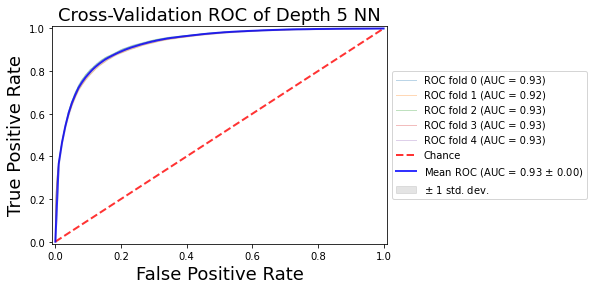

In [82]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d5)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 51

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d5 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    decoding_d5, time_mwpm = do_new_decoding(x_test_d5, 5, 0)
    decoding_d5['combine'] = decoding_d5[[0, 1]].values.tolist()
    decoding_d5['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d5 = np.array(decoding_d5[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb.transform(decoding_d5)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))
    
    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d5 = lookup_decoder(5)
    
    lookup_d5 = train_plut(lookup_d5, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d5 = test_plut(lookup_d5, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d5)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d5, mlb)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d5, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d5 = compile_FFNN_cv_model_DepthFive(5)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    history = model_d5.fit(
    inputs_train,
    targets[train],
    validation_split=.25,
    epochs = 800)
    
   # Generate generalization metrics
    scores = model_d5.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d5 = model_d5.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d5.copy() #change here
    pred[pred>=.4]=1 
    pred[pred<.4]=0
    
    if fold_no < 5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    
    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d5.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d5[:, i]) 
        aucs_classes[mlb.classes_[i]].append(auc(fpr[i], tpr[i]))
        
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("##############################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("##############################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("##############################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
    
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 5 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# D7 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D7:
* Original:
    - "depth7_all_combos.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d7-1000.csv"
    - "v2samples-d7-10000.csv"
    - "v2samples-d7-500000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d7-1000.csv"

In [116]:
start_time = time.time()
trainData_d7 = pd.read_csv("SAMPLES/depth7_all_combos.csv")
trainData_d7 = trainData_d7.applymap(lambda x: add_noise(x,.01))

#These four lines remove duplicates
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))
trainData_d7['Labels'] = trainData_d7['Labels'].astype(str)
trainData_d7 = trainData_d7.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))

testData_d7_MWPM = graph_with_errs_d7(trainData_d7)

#transforms the data to encoding for ML
mlb_d7 = MultiLabelBinarizer()
mlb_d7.fit(trainData_d7['Labels'])
df = pd.DataFrame(mlb_d7.transform(trainData_d7['Labels']))
df['Labels']= df.values.tolist()
trainData_d7 = trainData_d7.drop(['Labels'], axis=1)
trainData_d7 = pd.concat([df["Labels"],testData_d7_MWPM, trainData_d7], axis=1, ignore_index=True)
trainData_d7.columns = ["Labels","XSyn", "ZSyn","X0", "Z1", "X2", "X3", "Z4", "X5", "X6", "Z7", "X8", "Z9", "Z10", "X11", "Z12", "X13", "Z14", "X15", "Z16", "Z17", "X18", "Z19","X20", "Z21", "X22", "Z23", "Z24", "X25", "Z26", "X27", "Z28", "X29", "Z30", "Z31", "X32", "Z33", "X34", "Z35", "X36", "Z37", "Z38", "X39", "X40", "Z41", "X42", "X43", "Z44", "X45", "X46", "Z47"]

y_d7 = trainData_d7["Labels"]
x_d7 = trainData_d7.drop(["Labels"], axis=1)

x_d7 = x_d7.replace([-1], 0)
print("Data imported and formatted in %s seconds" % (time.time() - start_time))

Data imported and formatted in 4324.438215970993 seconds


### Fit model on training data

In [110]:
start_time = time.time()
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d7.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d7 = inputs[:,2:]
train_output_d7 = targets

x_train_d7, x_test_d7, Y_train_d7, Y_test_d7 = train_test_split(train_input_d7, train_output_d7, train_size=0.75, shuffle=True)

model_d7 = compile_FFNN_cv_model_DepthSeven(7)
print("Fit model on training data")
history = model_d7.fit(
    x=x_train_d7,
    y=Y_train_d7,
    validation_split=.25,
    epochs=150
)
model_d7.summary()
print("Model trained in %s seconds" % (time.time() - start_time))

Fit model on training data
Train on 236870 samples, validate on 78957 samples
Epoch 1/150
236870/236870 [==============================] - 29s 121us/step - loss: 0.2010 - accuracy: 0.9478 - val_loss: 0.1925 - val_accuracy: 0.9502
Epoch 2/150
236870/236870 [==============================] - 29s 120us/step - loss: 0.1838 - accuracy: 0.9502 - val_loss: 0.1709 - val_accuracy: 0.9503
Epoch 3/150
236870/236870 [==============================] - 29s 121us/step - loss: 0.1582 - accuracy: 0.9508 - val_loss: 0.1478 - val_accuracy: 0.9514
Epoch 4/150
236870/236870 [==============================] - 29s 121us/step - loss: 0.1396 - accuracy: 0.9527 - val_loss: 0.1340 - val_accuracy: 0.9538
Epoch 5/150
236870/236870 [==============================] - 29s 121us/step - loss: 0.1283 - accuracy: 0.9553 - val_loss: 0.1238 - val_accuracy: 0.9566
Epoch 6/150
236870/236870 [==============================] - 30s 125us/step - loss: 0.1194 - accuracy: 0.9579 - val_loss: 0.1165 - val_accuracy: 0.9589
Epoch 7/15

236870/236870 [==============================] - 25s 105us/step - loss: 0.0748 - accuracy: 0.9712 - val_loss: 0.0770 - val_accuracy: 0.9704
Epoch 55/150
236870/236870 [==============================] - 25s 106us/step - loss: 0.0746 - accuracy: 0.9712 - val_loss: 0.0766 - val_accuracy: 0.9706
Epoch 56/150
236870/236870 [==============================] - 25s 104us/step - loss: 0.0744 - accuracy: 0.9713 - val_loss: 0.0758 - val_accuracy: 0.9707
Epoch 57/150
236870/236870 [==============================] - 25s 105us/step - loss: 0.0743 - accuracy: 0.9713 - val_loss: 0.0767 - val_accuracy: 0.9708
Epoch 58/150
236870/236870 [==============================] - 25s 105us/step - loss: 0.0741 - accuracy: 0.9714 - val_loss: 0.0794 - val_accuracy: 0.9698
Epoch 59/150
236870/236870 [==============================] - 25s 104us/step - loss: 0.0740 - accuracy: 0.9714 - val_loss: 0.0766 - val_accuracy: 0.9704
Epoch 60/150
236870/236870 [==============================] - 25s 106us/step - loss: 0.0738 - a

236870/236870 [==============================] - 27s 114us/step - loss: 0.0691 - accuracy: 0.9726 - val_loss: 0.0709 - val_accuracy: 0.9720
Epoch 108/150
236870/236870 [==============================] - 27s 114us/step - loss: 0.0690 - accuracy: 0.9727 - val_loss: 0.0719 - val_accuracy: 0.9715
Epoch 109/150
236870/236870 [==============================] - 27s 115us/step - loss: 0.0690 - accuracy: 0.9727 - val_loss: 0.0711 - val_accuracy: 0.9720
Epoch 110/150
236870/236870 [==============================] - 27s 114us/step - loss: 0.0689 - accuracy: 0.9727 - val_loss: 0.0718 - val_accuracy: 0.9719
Epoch 111/150
236870/236870 [==============================] - 27s 114us/step - loss: 0.0688 - accuracy: 0.9727 - val_loss: 0.0711 - val_accuracy: 0.9718
Epoch 112/150
236870/236870 [==============================] - 27s 114us/step - loss: 0.0688 - accuracy: 0.9728 - val_loss: 0.0715 - val_accuracy: 0.9715
Epoch 113/150
236870/236870 [==============================] - 27s 115us/step - loss: 0.06

In [111]:
predictions_d7 = model_d7.predict(x_test_d7)

y_pred = predictions_d7
y_test = Y_test_d7

y_pred[y_pred>=.5]=1 
y_pred[y_pred<.5]=0

TP = 0
FP = 0
TN = 0
FN = 0



for i in range(len(y_pred)-1):
    for j in range(len(y_test[0])-1):
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 1:
            TP += 1
        if y_pred[i][j] == 1 and y_test[i][j] != y_pred[i][j]:
            FP += 1
        if y_test[i][j] == y_pred[i][j] and y_test[i][j] == 0:
            TN += 1
        if y_pred[i][j] == 0 and y_test[i][j] != y_pred[i][j]:
            FN += 1

        
print("True positive:   " + str(TP) + "\nFalse positive:  " + str(FP) + "\nTrue negative:   " + str(TN) + "\nFalse negative:  " + str(FN))



True positive:   308881
False positive:  84933
True negative:   9718555
False negative:  204581


### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

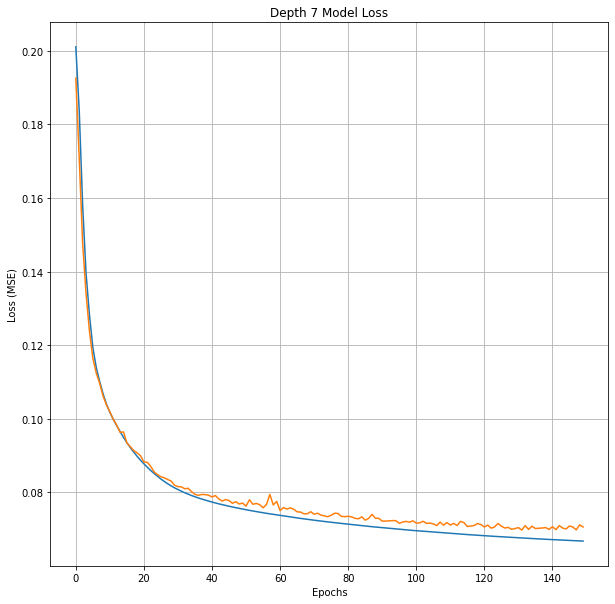

In [112]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 7 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

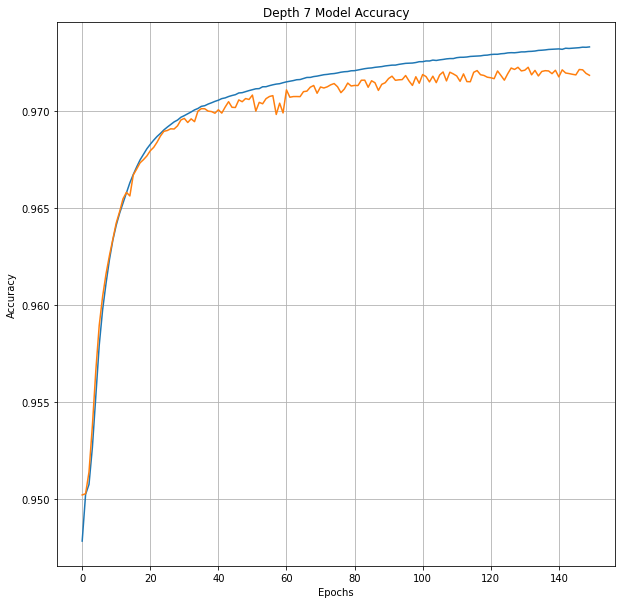

In [113]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 7 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [114]:
model_d7.save("model_d7_v2-500k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 254089 samples, validate on 84697 samples
Epoch 1/150
254089/254089 [==============================] - 31s 123us/step - loss: 0.1625 - accuracy: 0.9605 - val_loss: 0.1861 - val_accuracy: 0.9523
Epoch 2/150
254089/254089 [==============================] - 31s 121us/step - loss: 0.1392 - accuracy: 0.9625 - val_loss: 0.1470 - val_accuracy: 0.9532
Epoch 3/150
254089/254089 [==============================] - 30s 120us/step - loss: 0.1074 - accuracy: 0.9650 - val_loss: 0.1150 - val_accuracy: 0.9599
Epoch 4/150
254089/254089 [==============================] - 32s 126us/step - loss: 0.0872 - accuracy: 0.9698 - val_loss: 0.1005 - val_accuracy: 0.9646
Epoch 5/150
254089/254089 [==============================] - 31s 122us/step - loss: 0.0766 - accuracy: 0.9732 - val_loss: 0.0922 - val_accuracy: 0.9677
Epoch 6/150
254089/254089 [==============================] - 31s 122us/step - loss: 0.0699 -

254089/254089 [==============================] - 29s 114us/step - loss: 0.0359 - accuracy: 0.9860 - val_loss: 0.0489 - val_accuracy: 0.9832
Epoch 54/150
254089/254089 [==============================] - 28s 112us/step - loss: 0.0358 - accuracy: 0.9861 - val_loss: 0.0489 - val_accuracy: 0.9833
Epoch 55/150
254089/254089 [==============================] - 29s 115us/step - loss: 0.0357 - accuracy: 0.9861 - val_loss: 0.0480 - val_accuracy: 0.9834
Epoch 56/150
254089/254089 [==============================] - 29s 114us/step - loss: 0.0355 - accuracy: 0.9861 - val_loss: 0.0475 - val_accuracy: 0.9834
Epoch 57/150
254089/254089 [==============================] - 29s 113us/step - loss: 0.0354 - accuracy: 0.9862 - val_loss: 0.0477 - val_accuracy: 0.9835
Epoch 58/150
254089/254089 [==============================] - 29s 114us/step - loss: 0.0353 - accuracy: 0.9862 - val_loss: 0.0483 - val_accuracy: 0.9834
Epoch 59/150
254089/254089 [==============================] - 29s 113us/step - loss: 0.0351 - a

254089/254089 [==============================] - 29s 113us/step - loss: 0.0313 - accuracy: 0.9874 - val_loss: 0.0441 - val_accuracy: 0.9849
Epoch 107/150
254089/254089 [==============================] - 28s 112us/step - loss: 0.0312 - accuracy: 0.9874 - val_loss: 0.0437 - val_accuracy: 0.9850
Epoch 108/150
254089/254089 [==============================] - 28s 112us/step - loss: 0.0312 - accuracy: 0.9874 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 109/150
254089/254089 [==============================] - 29s 113us/step - loss: 0.0311 - accuracy: 0.9875 - val_loss: 0.0439 - val_accuracy: 0.9849
Epoch 110/150
254089/254089 [==============================] - 29s 113us/step - loss: 0.0311 - accuracy: 0.9875 - val_loss: 0.0433 - val_accuracy: 0.9851
Epoch 111/150
254089/254089 [==============================] - 29s 114us/step - loss: 0.0310 - accuracy: 0.9875 - val_loss: 0.0435 - val_accuracy: 0.9850
Epoch 112/150
254089/254089 [==============================] - 29s 113us/step - loss: 0.03

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 2 ...
Train on 254090 samples, validate on 84697 samples
Epoch 1/150
254090/254090 [==============================] - 30s 119us/step - loss: 0.1631 - accuracy: 0.9603 - val_loss: 0.1866 - val_accuracy: 0.9523
Epoch 2/150
254090/254090 [==============================] - 31s 121us/step - loss: 0.1396 - accuracy: 0.9625 - val_loss: 0.1458 - val_accuracy: 0.9534
Epoch 3/150
254090/254090 [==============================] - 30s 117us/step - loss: 0.1078 - accuracy: 0.9651 - val_loss: 0.1168 - val_accuracy: 0.9598
Epoch 4/150
254090/254090 [==============================] - 30s 118us/step - loss: 0.0900 - accuracy: 0.9692 - val_loss: 0.1027 - val_accuracy: 0.9643
Epoch 5/150
254090/254090 [==============================] - 30s 118us/step - loss: 0.0783 - accuracy: 0.9727 - val_loss: 0.0934 - val_accuracy: 0.9678
Epoch 6/150
254090/254090 [==============================] - 30s 118us/step - loss: 0.0708 -

254090/254090 [==============================] - 35s 138us/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0496 - val_accuracy: 0.9832
Epoch 54/150
254090/254090 [==============================] - 35s 138us/step - loss: 0.0360 - accuracy: 0.9860 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 55/150
254090/254090 [==============================] - 35s 138us/step - loss: 0.0359 - accuracy: 0.9861 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 56/150
254090/254090 [==============================] - 35s 138us/step - loss: 0.0358 - accuracy: 0.9861 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 57/150
254090/254090 [==============================] - 35s 138us/step - loss: 0.0356 - accuracy: 0.9861 - val_loss: 0.0488 - val_accuracy: 0.9833
Epoch 58/150
254090/254090 [==============================] - 36s 141us/step - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0492 - val_accuracy: 0.9833
Epoch 59/150
254090/254090 [==============================] - 33s 129us/step - loss: 0.0354 - a

254090/254090 [==============================] - 30s 118us/step - loss: 0.0316 - accuracy: 0.9873 - val_loss: 0.0447 - val_accuracy: 0.9849
Epoch 107/150
254090/254090 [==============================] - 30s 117us/step - loss: 0.0315 - accuracy: 0.9874 - val_loss: 0.0439 - val_accuracy: 0.9848
Epoch 108/150
254090/254090 [==============================] - 30s 118us/step - loss: 0.0315 - accuracy: 0.9874 - val_loss: 0.0447 - val_accuracy: 0.9848
Epoch 109/150
254090/254090 [==============================] - 30s 119us/step - loss: 0.0314 - accuracy: 0.9874 - val_loss: 0.0444 - val_accuracy: 0.9849
Epoch 110/150
254090/254090 [==============================] - 30s 118us/step - loss: 0.0313 - accuracy: 0.9874 - val_loss: 0.0452 - val_accuracy: 0.9848
Epoch 111/150
254090/254090 [==============================] - 30s 120us/step - loss: 0.0313 - accuracy: 0.9874 - val_loss: 0.0439 - val_accuracy: 0.9850
Epoch 112/150
254090/254090 [==============================] - 30s 116us/step - loss: 0.03

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 254090 samples, validate on 84697 samples
Epoch 1/150
254090/254090 [==============================] - 29s 116us/step - loss: 0.1619 - accuracy: 0.9610 - val_loss: 0.1864 - val_accuracy: 0.9523
Epoch 2/150
254090/254090 [==============================] - 30s 116us/step - loss: 0.1430 - accuracy: 0.9625 - val_loss: 0.1542 - val_accuracy: 0.9526
Epoch 3/150
254090/254090 [==============================] - 30s 116us/step - loss: 0.1132 - accuracy: 0.9642 - val_loss: 0.1211 - val_accuracy: 0.9583
Epoch 4/150
254090/254090 [==============================] - 29s 115us/step - loss: 0.0922 - accuracy: 0.9686 - val_loss: 0.1054 - val_accuracy: 0.9633
Epoch 5/150
254090/254090 [==============================] - 29s 115us/step - loss: 0.0814 - accuracy: 0.9719 - val_loss: 0.0962 - val_accuracy: 0.9665
Epoch 6/150
254090/254090 [==============================] - 29s 116us/step - loss: 0.0739 -

254090/254090 [==============================] - 30s 117us/step - loss: 0.0366 - accuracy: 0.9859 - val_loss: 0.0491 - val_accuracy: 0.9831
Epoch 54/150
254090/254090 [==============================] - 30s 116us/step - loss: 0.0365 - accuracy: 0.9859 - val_loss: 0.0487 - val_accuracy: 0.9832
Epoch 55/150
254090/254090 [==============================] - 29s 116us/step - loss: 0.0363 - accuracy: 0.9860 - val_loss: 0.0494 - val_accuracy: 0.9831
Epoch 56/150
254090/254090 [==============================] - 30s 117us/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0491 - val_accuracy: 0.9832
Epoch 57/150
254090/254090 [==============================] - 29s 116us/step - loss: 0.0360 - accuracy: 0.9860 - val_loss: 0.0489 - val_accuracy: 0.9832
Epoch 58/150
254090/254090 [==============================] - 29s 116us/step - loss: 0.0359 - accuracy: 0.9861 - val_loss: 0.0491 - val_accuracy: 0.9832
Epoch 59/150
254090/254090 [==============================] - 30s 117us/step - loss: 0.0358 - a

254090/254090 [==============================] - 29s 115us/step - loss: 0.0318 - accuracy: 0.9873 - val_loss: 0.0445 - val_accuracy: 0.9847
Epoch 107/150
254090/254090 [==============================] - 29s 115us/step - loss: 0.0317 - accuracy: 0.9873 - val_loss: 0.0438 - val_accuracy: 0.9849
Epoch 108/150
254090/254090 [==============================] - 29s 115us/step - loss: 0.0317 - accuracy: 0.9873 - val_loss: 0.0440 - val_accuracy: 0.9849
Epoch 109/150
254090/254090 [==============================] - 29s 116us/step - loss: 0.0316 - accuracy: 0.9873 - val_loss: 0.0441 - val_accuracy: 0.9849
Epoch 110/150
254090/254090 [==============================] - 30s 117us/step - loss: 0.0316 - accuracy: 0.9874 - val_loss: 0.0439 - val_accuracy: 0.9848
Epoch 111/150
254090/254090 [==============================] - 30s 116us/step - loss: 0.0315 - accuracy: 0.9874 - val_loss: 0.0443 - val_accuracy: 0.9849
Epoch 112/150
254090/254090 [==============================] - 29s 115us/step - loss: 0.03

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[200, 0]
[0, 0]
both b and c are zero
[200, 0]
[0, 0]
both b and c are zero
[194, 3]
[3, 0]
[195, 2]
[1, 2]
[192, 2]
[6, 0]
[187, 7]
[1, 5]
[197, 1]
[2, 0]
[195, 3]
[0, 2]
[197, 2]
[1, 0]
[187, 12]
[1, 0]
[196, 2]
[1, 1]
[185, 13]
[2, 0]
[194, 3]
[1, 2]
[189, 8]
[3, 0]
[179, 12]
[2, 7]
[184, 7]
[4, 5]
[185, 11]
[4, 0]
[193, 3]
[0, 4]
[195, 2]
[2, 1]
[194, 3]
[1, 2]
[195, 3]
[2, 0]
[192, 6]
[0, 2]
[199, 1]
[0, 0]
[196, 4]
[0, 0]
[196, 2]
[1, 1]
[192, 6]
[1, 1]
[194, 5]
[0, 1]
[193, 6]
[0, 1]
[186, 4]
[3, 7]
[186, 4]
[2, 8]
[196, 1]
[1, 2]
[195, 2]
[1, 2]
[194, 4]
[0, 2]
[194, 4]
[2, 0]
[200, 0]
[0, 0]
both b and c are zero
[195, 5]
[0, 0]
[200, 0]
[0, 0]
both b and c are zero
[190, 10]
[0, 0]
[198, 0]
[1, 1]
[194, 4]
[1, 1]
[193, 5]
[1, 1]
[190, 8]
[1, 1]
[185, 12]
[1, 2]
[191, 6]
[0, 3]
[186, 12]
[2, 0]
[194, 4]
[1, 1]
[193, 6]
[0, 1]
[193, 6]
[1, 0]
[196, 2]
[2, 0]
[194, 4]
[2, 0]
[197, 0]
[0, 3]
both b and c are zero
[190, 7]
[2, 1]
[197, 0]
[1, 2]
[191, 6]
[1, 2]
[192, 5]
[1, 2]
[18

<Figure size 720x720 with 0 Axes>

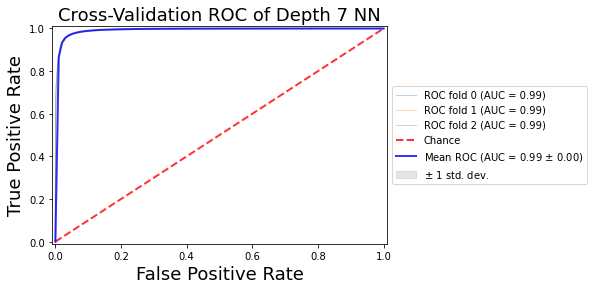

In [117]:
kfold = KFold(n_splits=3, shuffle=True)
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d7)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 99

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d7.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    t_test = targets[test].copy()
    x_test_d7 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    indices = np.random.choice(inputs[test].shape[0], 200, replace=False)#20000, replace=False)
    x_test_d7 = x_test_d7[indices]
    inputs_test_2 = inputs_test[indices]
    targets_test_2 = targets[test][indices]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    
    decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
    decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
    decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d7 = np.array(decoding_d7[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb_d7.transform(decoding_d7)

    if fold_no < 3:
        acc = partial_accuracy(targets_test_2, pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d7 = lookup_decoder(7)
    
    lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d7 = test_plut(lookup_d7, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 3:
        acc = partial_accuracy(targets[test], pred_plut_d7)
        f1 = f1_score(targets[test], pred_plut_d7, average='micro')
    else:
        pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
        f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
        acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1)
    
    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d7 = compile_FFNN_cv_model_DepthSeven(7)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_d7.fit(
        x=inputs_train ,
        y=targets[train],
        validation_split=.25,
        epochs= 150)
    
   # Generate generalization metrics
    scores = model_d7.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d7 = model_d7.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d7.copy() #change here
    pred[pred>=.5]=1 
    pred[pred<.5]=0
     
    if fold_no < 3:
        acc = scores[1]
        f1 = f1_score(targets[test], pred, average='micro')
    else:
        pred = model_d7.predict(inputs_test_2)
        pred[pred>=.5]=1 
        pred[pred<.5]=0
        acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
        f1 = f1_score(targets_test_2, pred, average='micro')
 
    acc_per_fold.append(acc)
    f1_per_fold.append(f1)

    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
        aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## End